In this chapter, we will make use of two of the first algorithmically described machine learning algorithms for classification: 
the perceptron and adaptive linear neurons. 
We will start by implementing a perceptron step by step in Python and training it to classify different flower species in the Iris dataset. This will help us to understand the concept of machine learning algorithms for classification and how they can be efficiently implemented in Python.

Discussing the basics of optimization using adaptive linear neurons will then lay the groundwork 
for using more sophisticated classifiers via the scikit-learn machine learning library in Chapter 3.

A Tour of Machine Learning Classifiers Using Scikit-Learn.

The topics that we will cover in this chapter are as follows:

- Building an understanding of machine learning algorithms
- Using pandas, NumPy, and Matplotlib to read in, process, and visualize data
- Implementing linear classifiers for 2-class problems in Python


 #### Training Machine Learning Algorithms for Classification

In [2]:
from IPython.display import Image

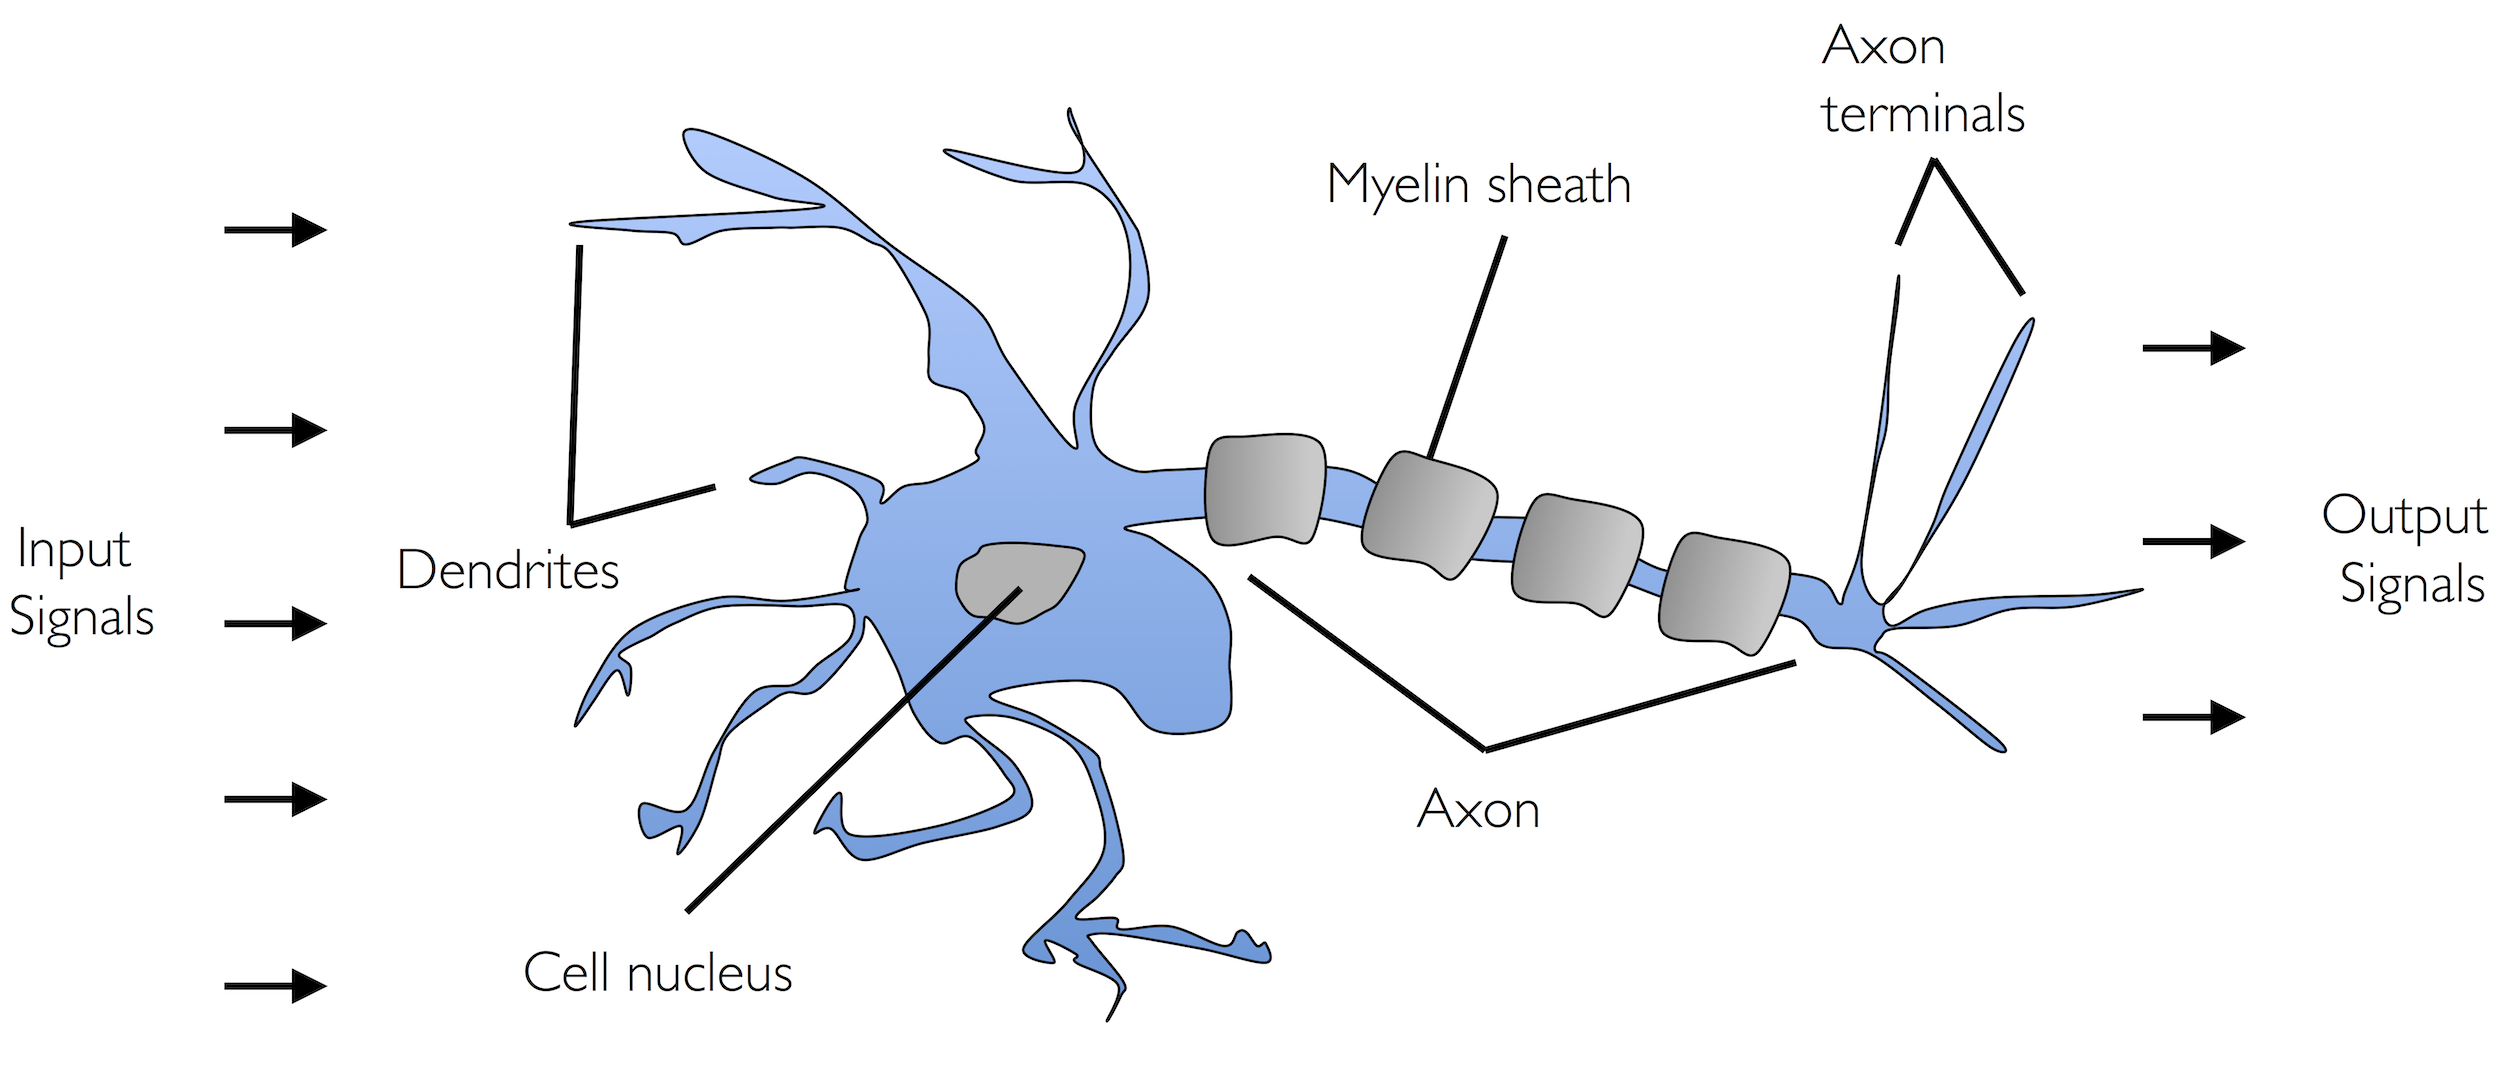

In [10]:
Image(filename='./figures/02_01.png',width=800)

McCulloch and Pitts described such a nerve cell as a simple logic gate with binary outputs; multiple
signals arrive at the dendrites, they are then integrated into the cell body, and, if the accumulated
signal exceeds a certain threshold, an output signal is generated that will be passed on by the axon.


Only a few years later, Frank Rosenblatt published the first concept of the perceptron learning rule
based on the MCP neuron model (The Perceptron: A Perceiving and Recognizing Automaton by F. Rosenblatt,
Cornell Aeronautical Laboratory, 1957). With his perceptron rule, Rosenblatt proposed an algorithm
that would automatically learn the optimal weight coefficients that would then be multiplied with the
input features in order to make the decision of whether a neuron fires (transmits a signal) or not. In
the context of supervised learning and classification, such an algorithm could then be used to predict
whether a new data point belongs to one class or the other.

The formal definition of an artificial neuron


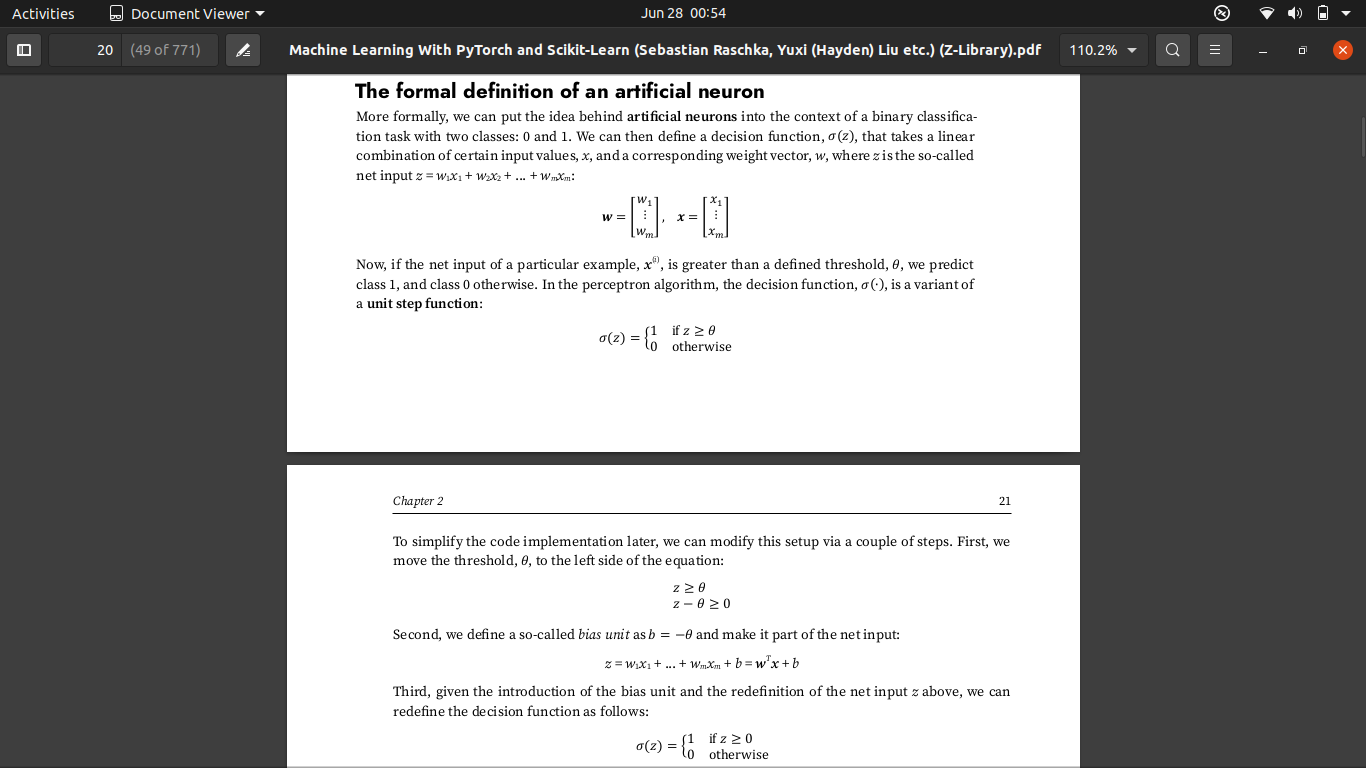

In [3]:
from IPython.display import Image
Image(filename='./figures/Screenshot from 2023-06-28 00-54-44.png',width=800,height=500)

Figure 2.2 illustrates how the net input z = w T x + b is squashed into a binary output (0 or 1) by the
decision function of the perceptron (left subfigure) and how it can be used to discriminate between
two classes separable by a linear decision boundary (right subfigure):

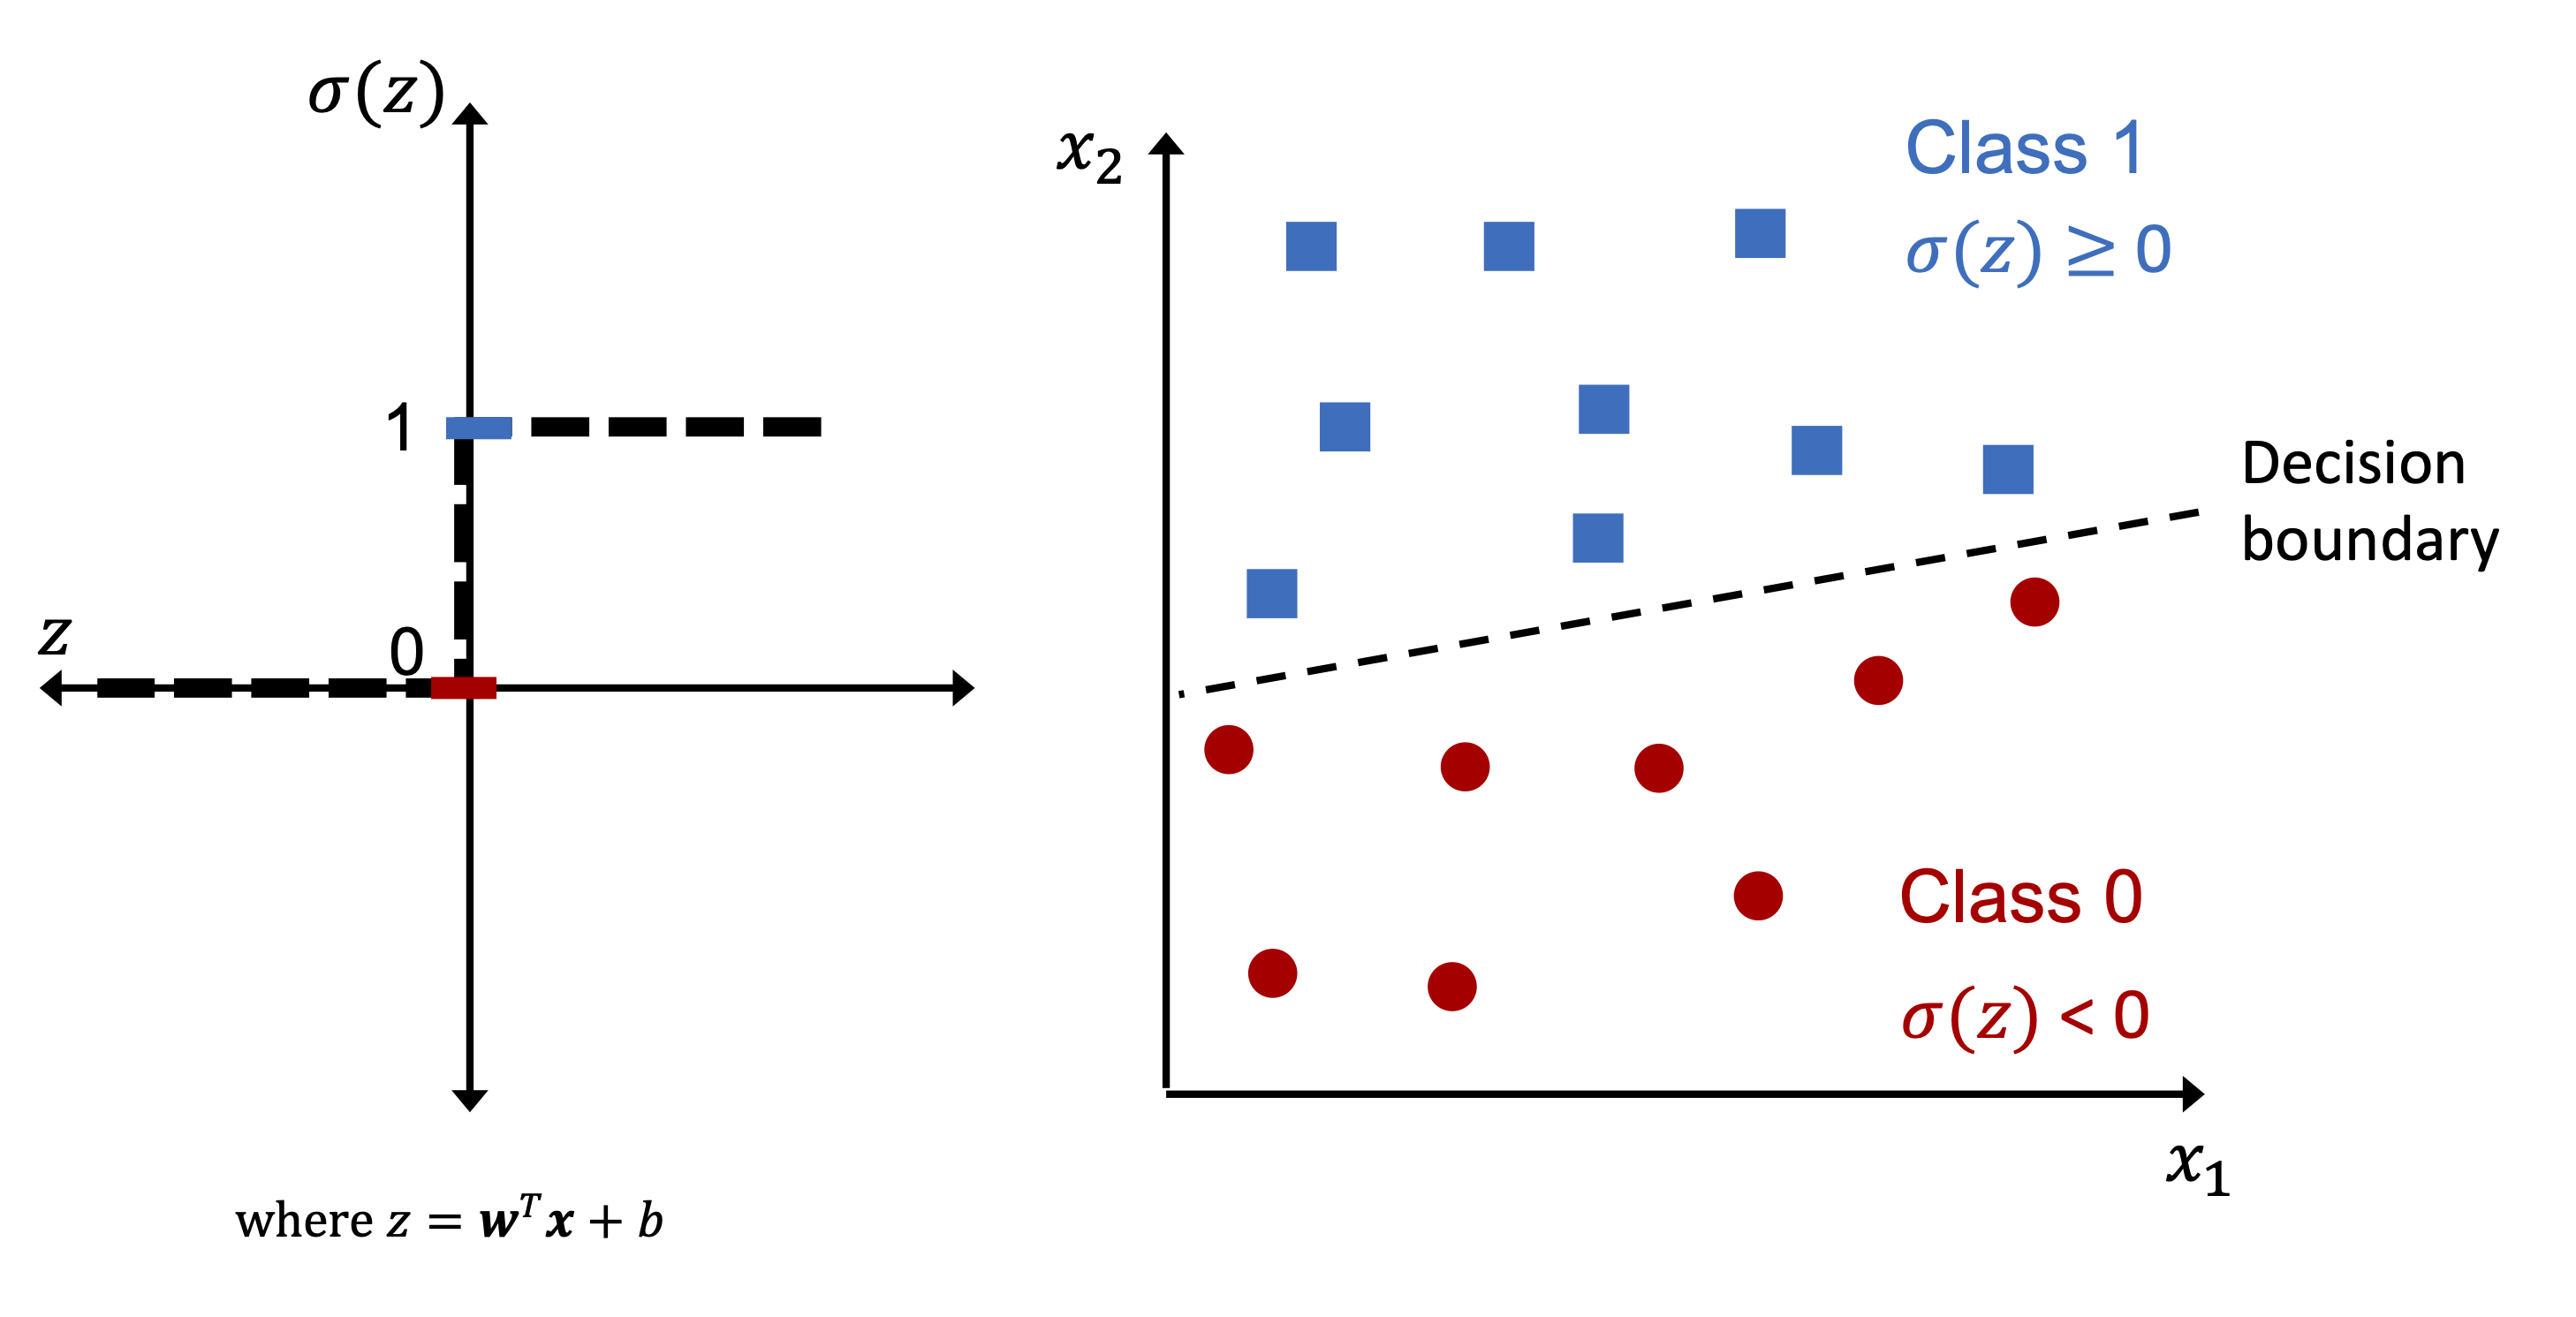

In [11]:
# from PIL import Image
Image(filename='./figures/02_02.png',width=800,height=500)

Figure 2.2: A threshold function producing a linear decision boundary for a binary classification
problem

The perceptron learning rule


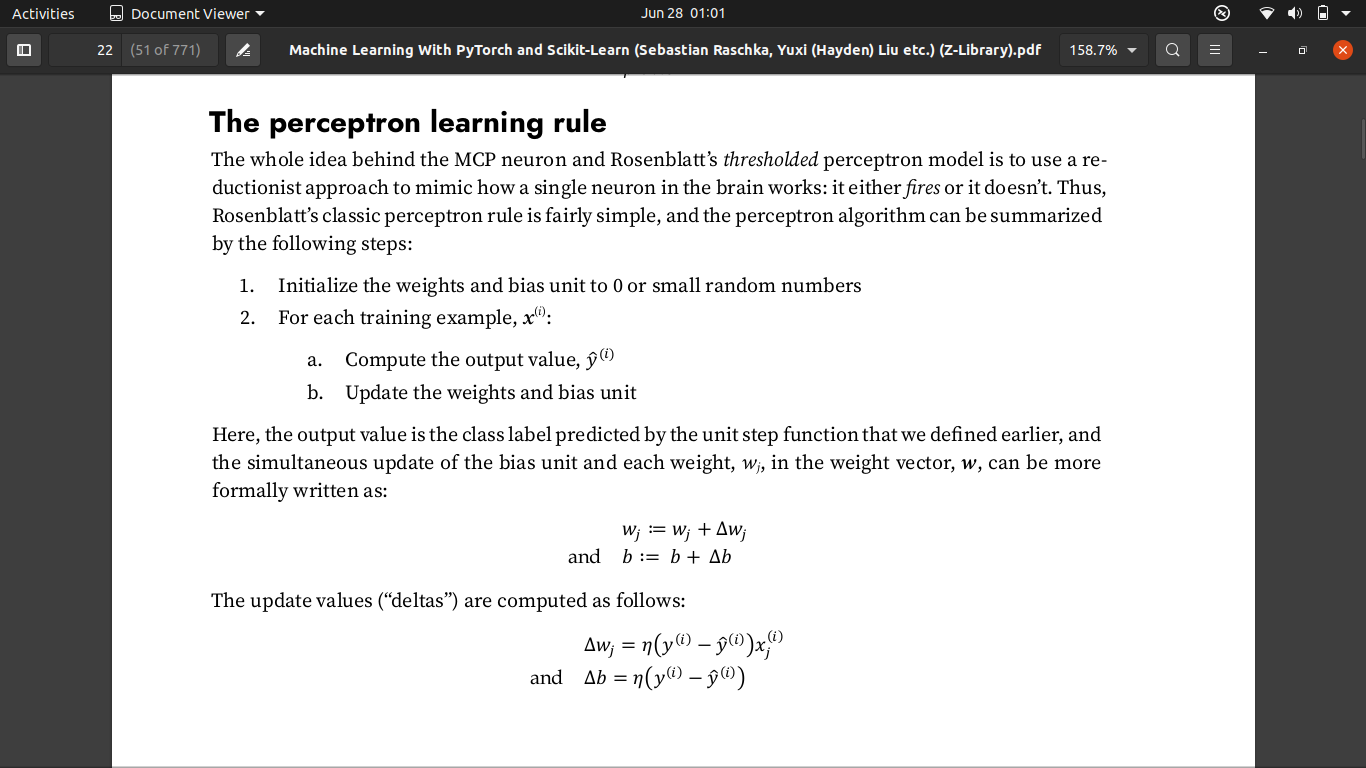

In [6]:
Image(filename='./figures/Screenshot from 2023-06-28 01-01-20.png',width=800,height=500)
# Image(filename='./figures/Screenshot from 2023-06-22 16-36-07.png',width=800,height=500)

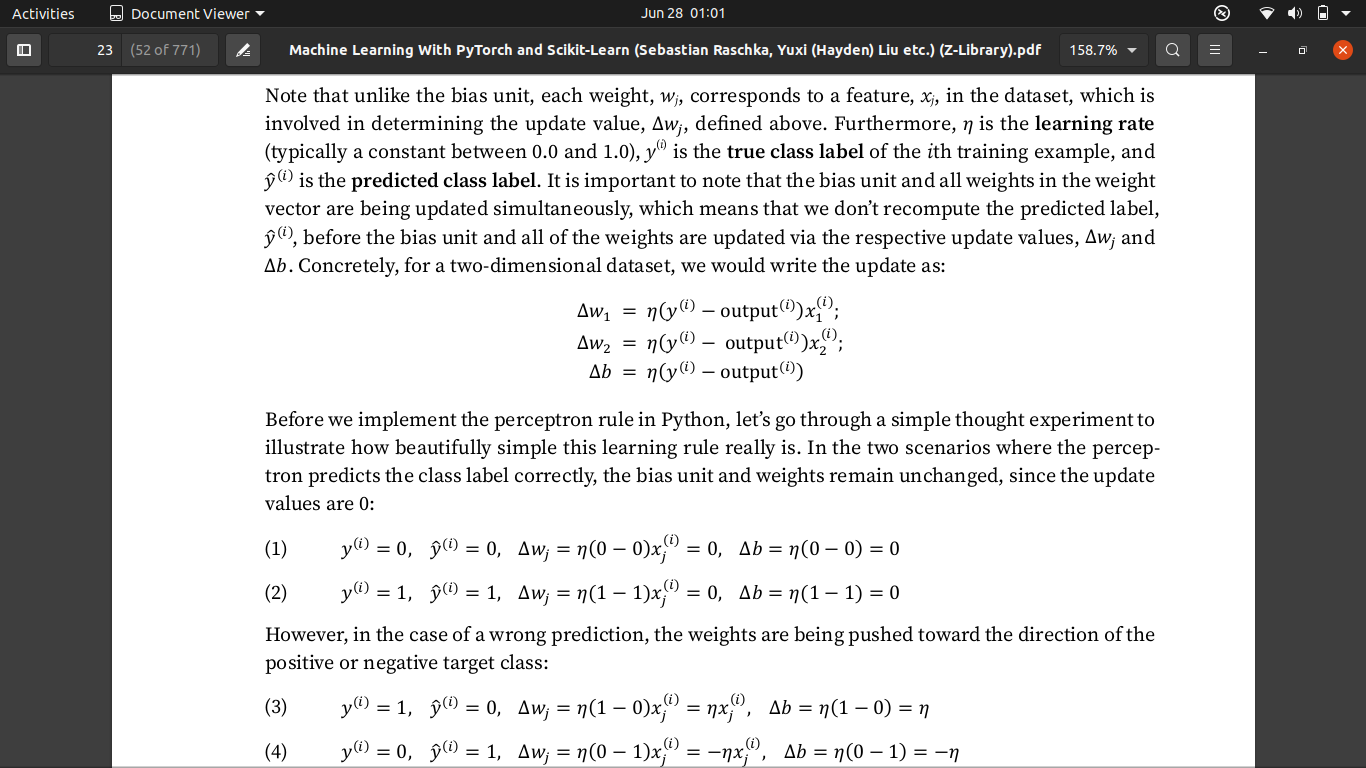

In [7]:
Image(filename='./figures/Screenshot from 2023-06-28 01-01-27.png',width=800,height=500)

It is important to note that the convergence of the perceptron is only guaranteed if the two classes
are linearly separable, which means that the two classes cannot be perfectly separated by a linear
decision boundary. (Interested readers can find the convergence proof in my lecture notes: https://
sebastianraschka.com/pdf/lecture-notes/stat453ss21/L03_perceptron_slides.pdf ). Figure 2.3
shows visual examples of linearly separable and linearly inseparable scenarios:

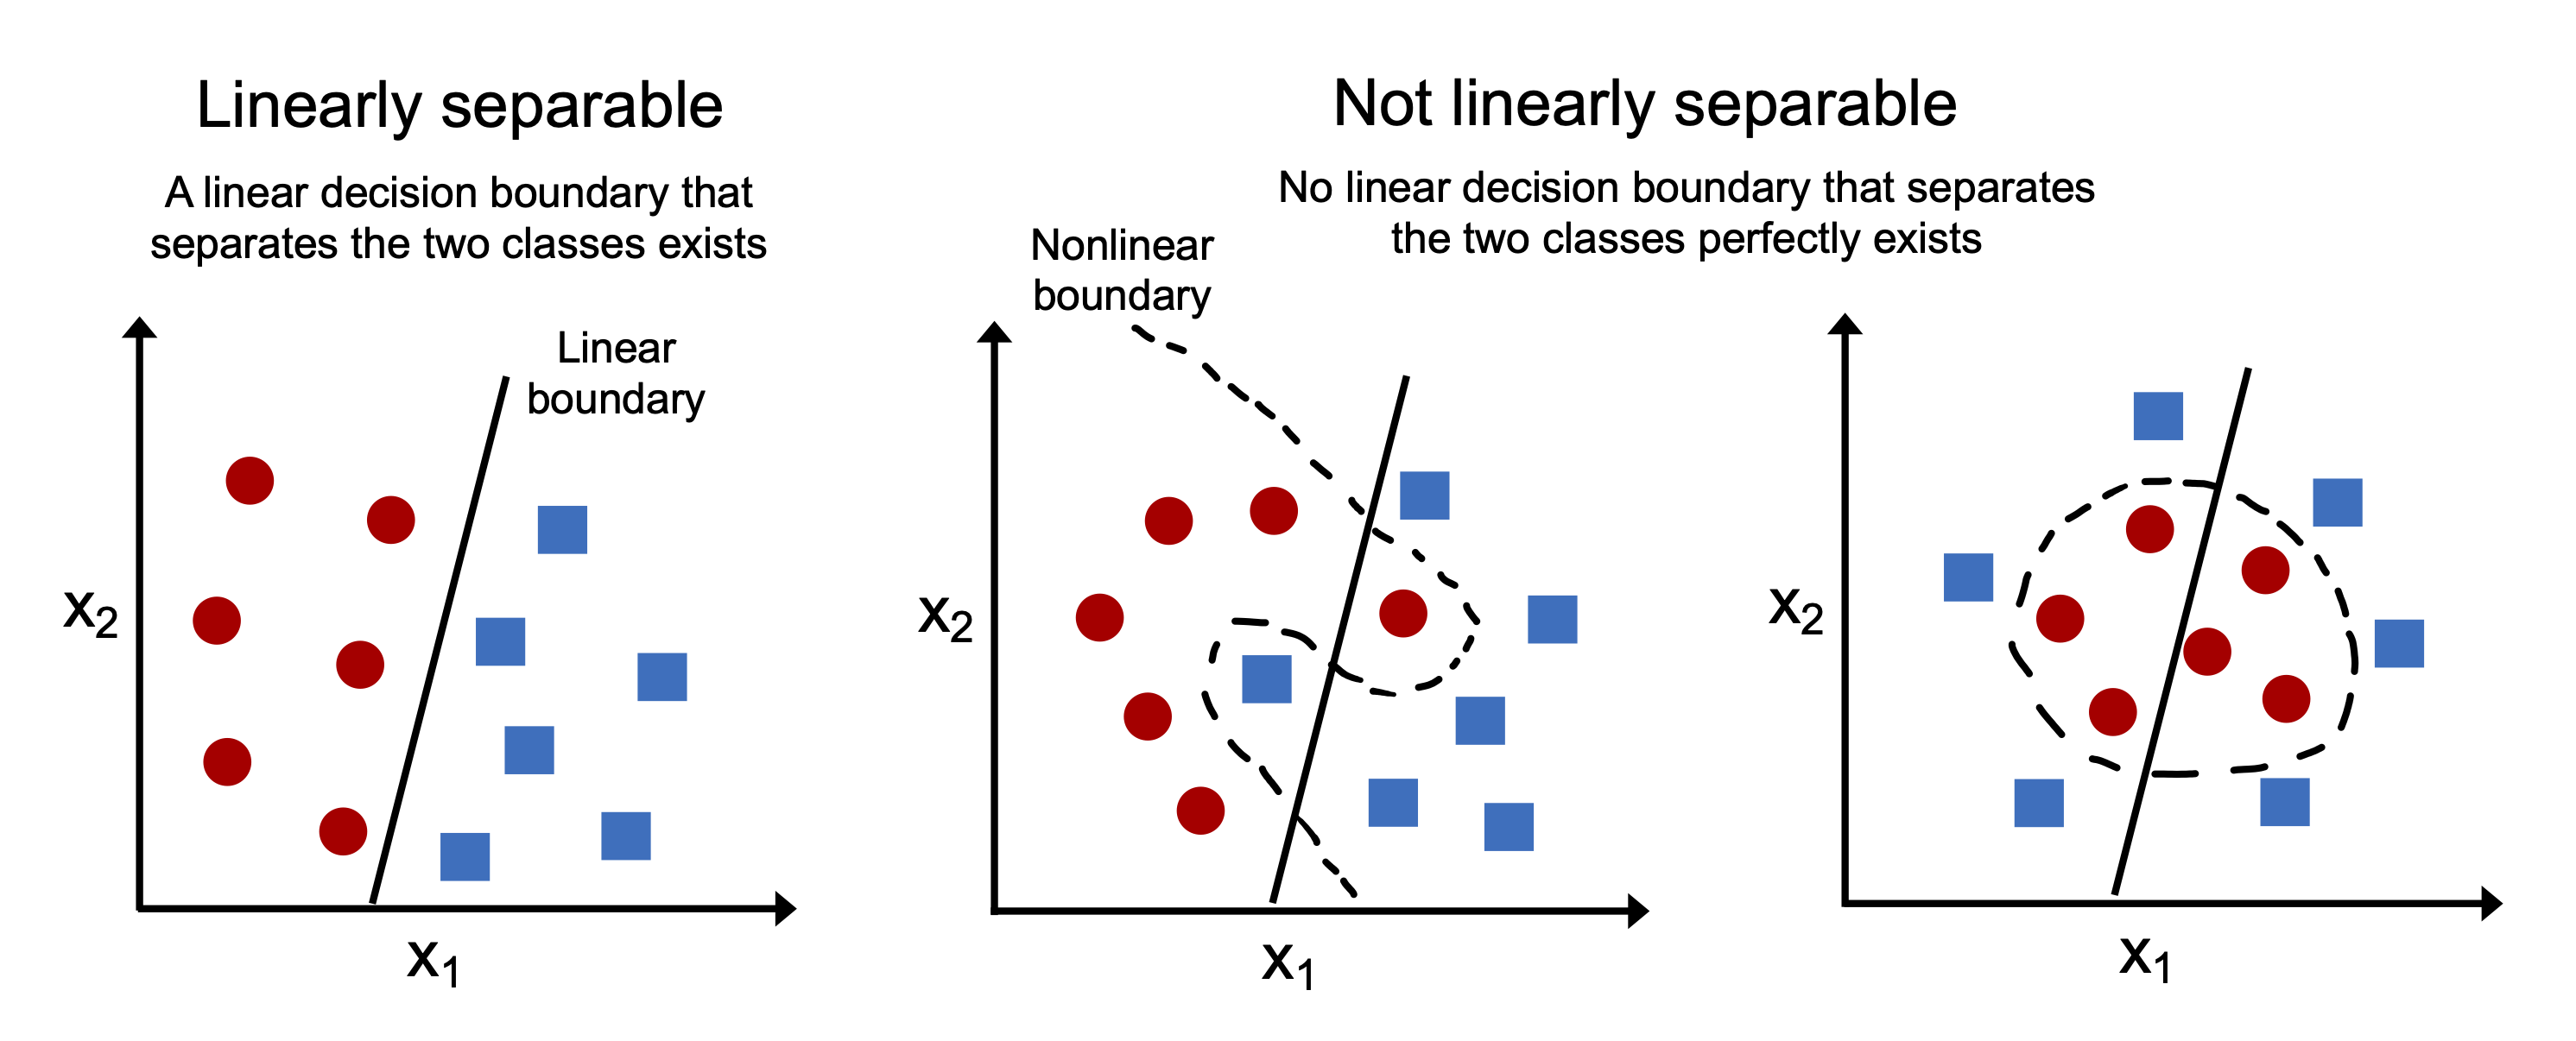

In [9]:
# from PIL import Image
Image(filename='./figures/02_03.png',width=900,height=500)

If the two classes can’t be separated by a linear decision boundary, we can set a maximum number
of passes over the training dataset (epochs) and/or a threshold for the number of tolerated misclas-
sifications—the perceptron would never stop updating the weights otherwise. Later in this chapter,
we will cover the Adaline algorithm that produces linear decision boundaries and converges even if
the classes are not perfectly linearly separable. In Chapter 3, we will learn about algorithms that can
produce nonlinear decision boundaries.

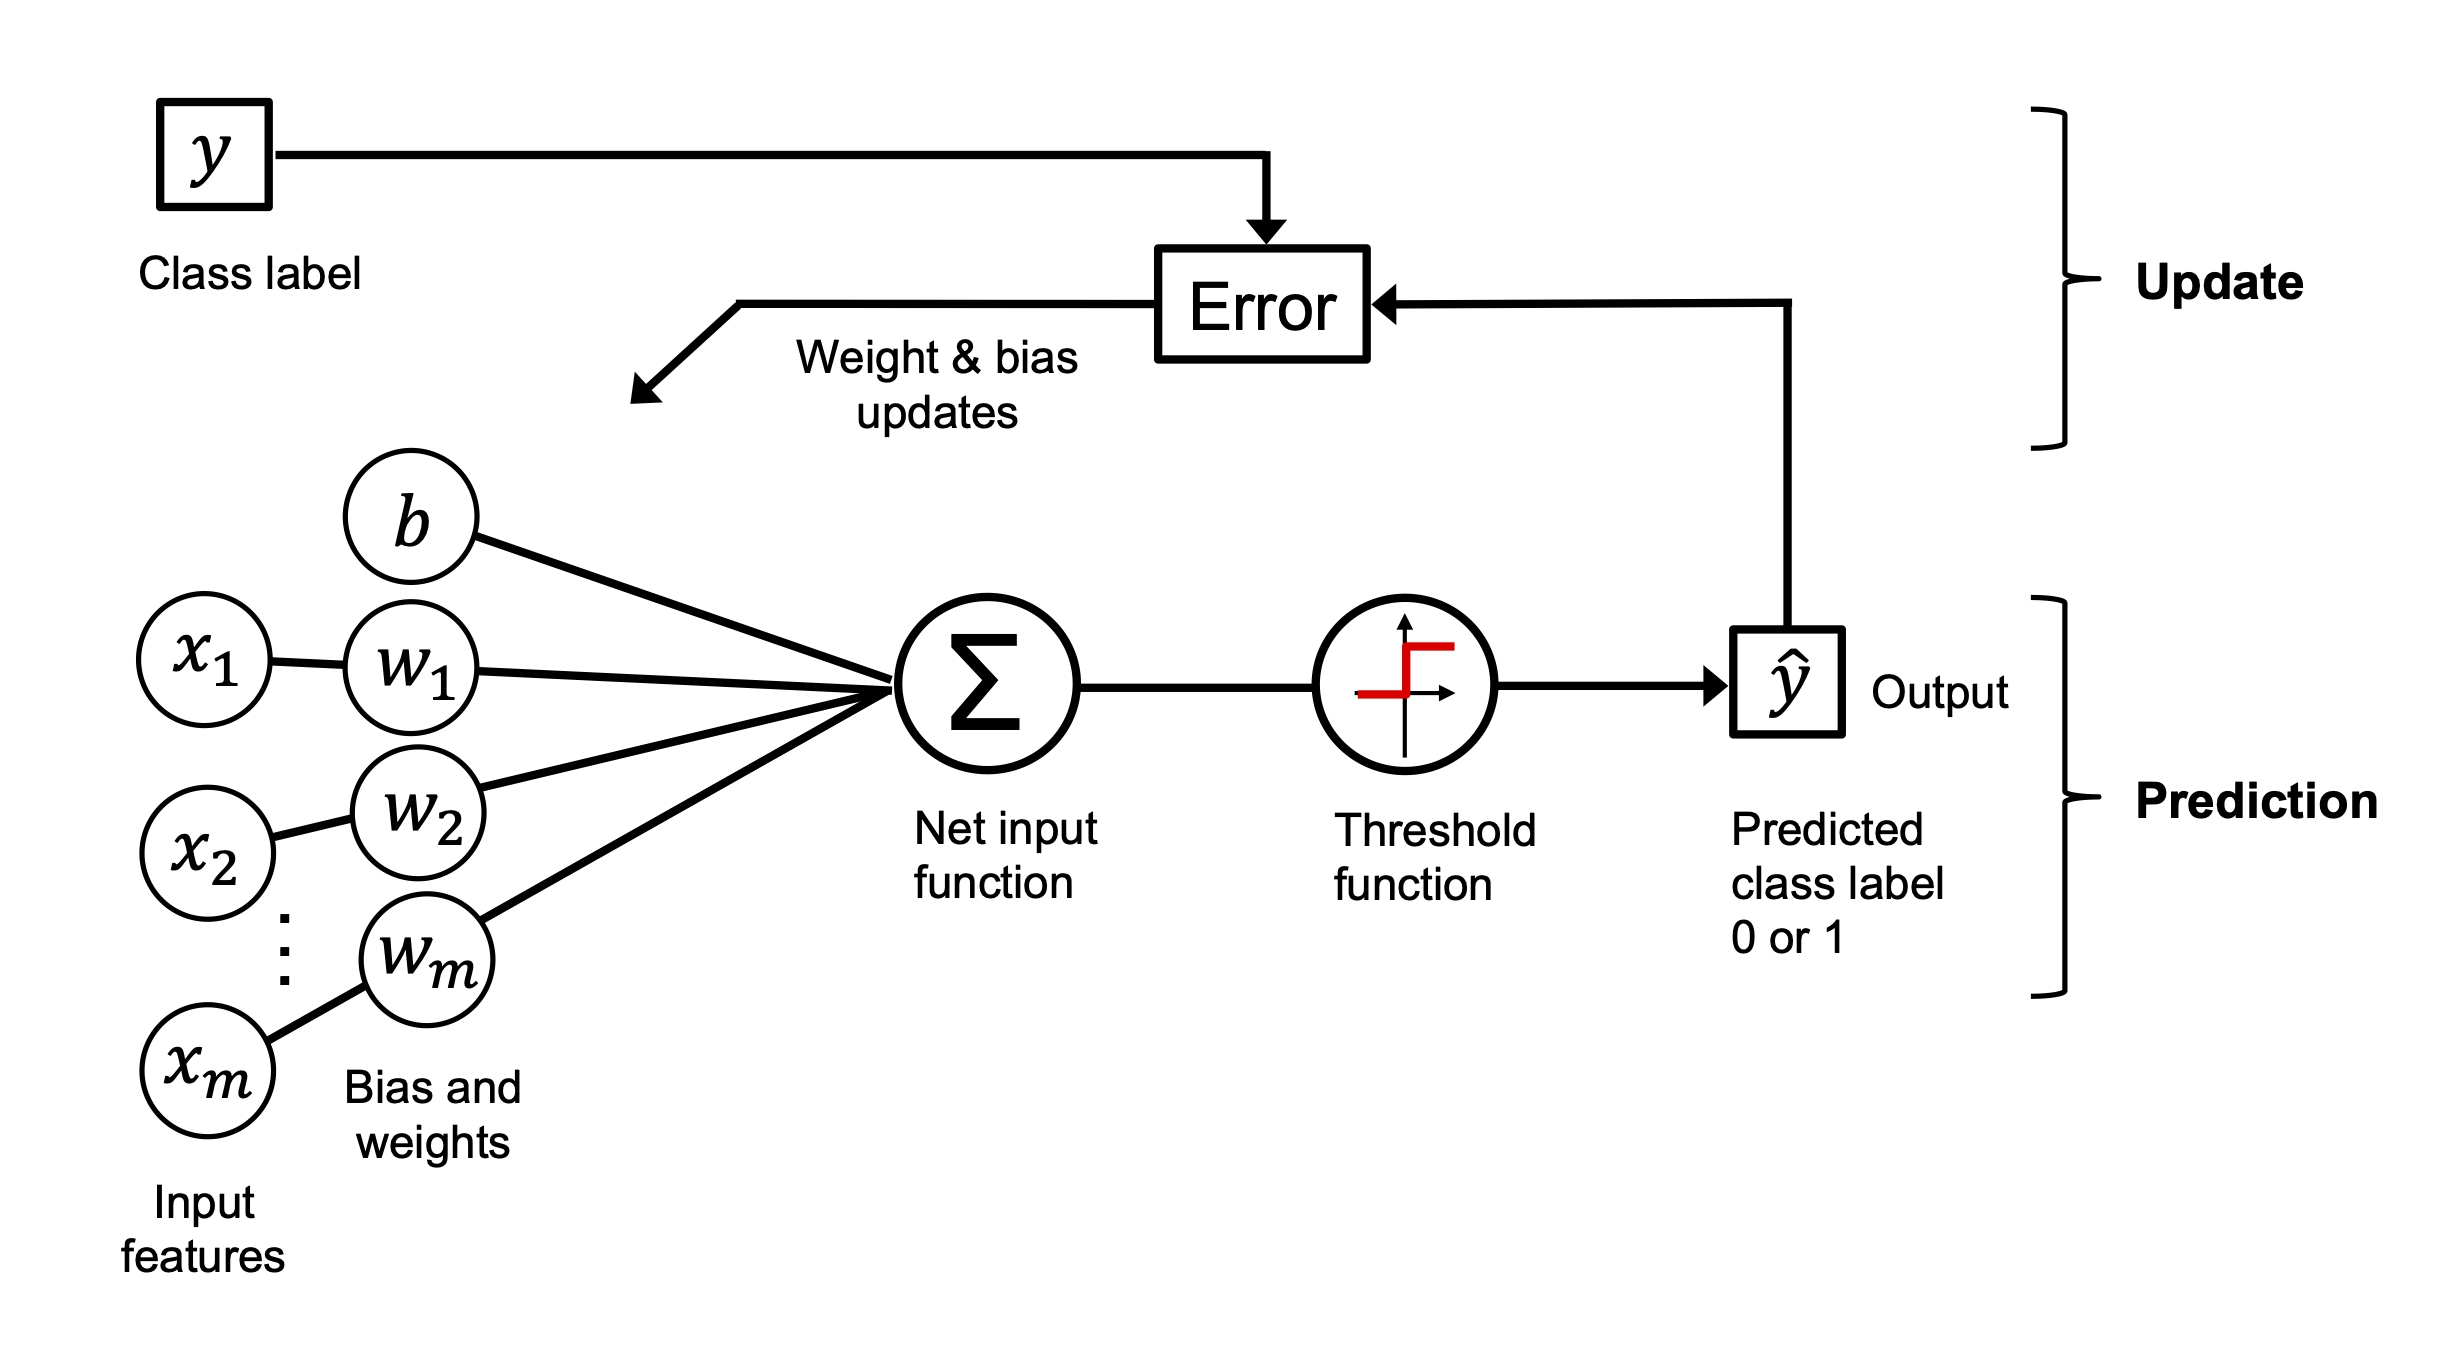

In [10]:
Image(filename='./figures/02_04.png',width=900,height=500)

## Implementing a perceptron learning algorithm in Python


An object-oriented perceptron API


In [14]:
!pip install -q numpy pandas matplotlib

In [21]:
import numpy as np

class Perceptron:
    
    """Perceptron classifier.
    
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight
        initialization.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    b_ : scalar
        Bias unit after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch. 
    """
    def __init__(self, eta=0.01, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit trainig data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.0)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def predict(self,X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        

Using this perceptron implementation, we can now initialize new Perceptron objects with a given
learning rate, eta ( 𝜂𝜂 ), and the number of epochs, n_iter (passes over the training dataset).

Via the fit method, we initialize the bias self.b_ to an initial value 0 and the weights in self.w_ to
a vector, ℝ 𝑚𝑚 , where m stands for the number of dimensions (features) in the dataset.

Notice that the initial weight vector contains small random numbers drawn from a normal distribution
with a standard deviation of 0.01 via rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) ,
where rgen is a NumPy random number generator that we seeded with a user-specified random seed
so that we can reproduce previous results if desired.

Technically, we could initialize the weights to zero (in fact, this is done in the original perceptron al-
gorithm). However, if we did that, then the learning rate 𝜂𝜂 ( eta ) would have no effect on the decision
boundary. If all the weights are initialized to zero, the learning rate parameter, eta , affects only the
scale of the weight vector, not the direction. If you are familiar with trigonometry, consider a vector,
v1 =[1 2 3], where the angle between v1 and a vector, v2 = 0.5 × v1, would be exactly zero, as demon-
strated by the following code snippet:

In [24]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

Here, np.arccos is the trigonometric inverse cosine, and np.linalg.norm is a function that computes
the length of a vector. (Our decision to draw the random numbers from a random normal distribu-
tion—for example, instead of from a uniform distribution—and to use a standard deviation of 0.01
was arbitrary; remember, we are just interested in small random values to avoid the properties of
all-zero vectors, as discussed earlier.)

As an optional exercise after reading this chapter, you can change self.w_ = rgen.normal(loc=0.0,
scale=0.01, size=X.shape[1]) to self.w_ = np.zeros(X.shape[1]) and run the perceptron train-
ing code presented in the next section with different values for eta . You will observe that the decision
boundary does not change.

#### **Training a perceptron model on the Iris dataset**


```
Reading-in the Iris data
import os
import pandas as pd


try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
```


In [12]:
# Reading-in the Iris data
import os
import pandas as pd


try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [13]:
df.tail()

0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

Plotting the Iris data


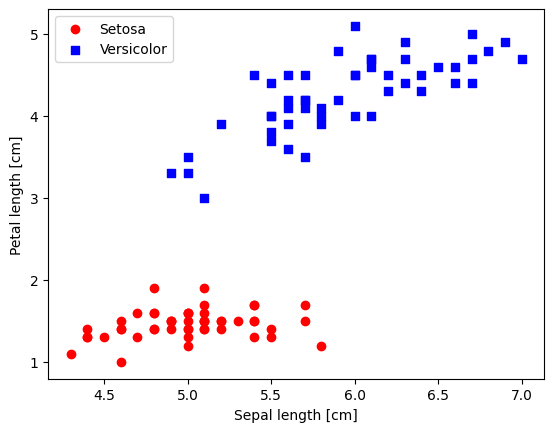

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

Training the perceptron model


Note that the number of misclassification errors and the number of updates is the same, since the
perceptron weights and bias are updated each time it misclassifies an example. After executing the
preceding code, we should see the plot of the misclassification errors versus the number of epochs,
as shown in Figure 2.7:

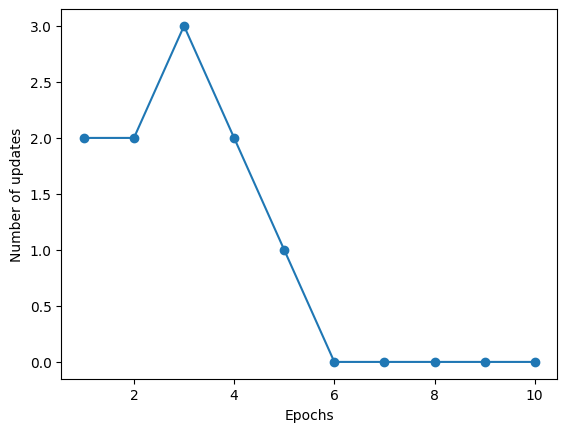

In [22]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

As we can see in Figure 2.7, our perceptron converged after the sixth epoch and should now be able
to classify the training examples perfectly. Let’s implement a small convenience function to visualize
the decision boundaries for two-dimensional datasets:

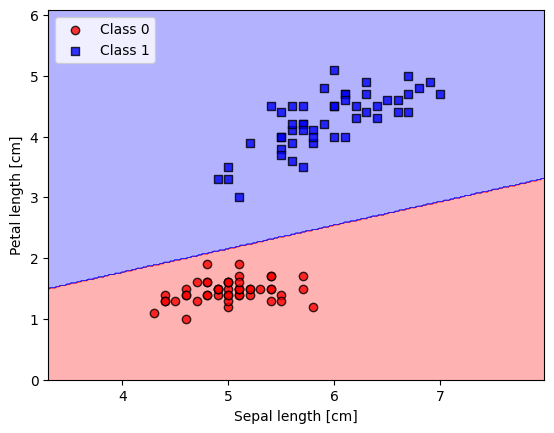

In [26]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
        




plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')


#plt.savefig('images/02_08.png', dpi=300)
plt.show()

Perceptron convergence
Although the perceptron classified the two Iris flower classes perfectly, convergence is
one of the biggest problems of the perceptron. Rosenblatt proved mathematically that
the perceptron learning rule converges if the two classes can be separated by a linear hy-
perplane. However, if the classes cannot be separated perfectly by such a linear decision
boundary, the weights will never stop updating unless we set a maximum number of ep-
ochs. Interested readers can find a summary of the proof in my lecture notes at https://
sebastianraschka.com/pdf/lecture-notes/stat453ss21/L03_perceptron_slides.
pdf.

Adaptive linear neurons and the convergence of learning

The Adaline algorithm is particularly interesting because it illustrates the key concepts of defining and
minimizing continuous loss functions. This lays the groundwork for understanding other machine
learning algorithms for classification, such as logistic regression, support vector machines, and mul-
tilayer neural networks, as well as linear regression models, which we will discuss in future chapters.

The key difference between the Adaline rule (also known as the Widrow-Hoff rule) and Rosenblatt’s
perceptron is that the weights are updated based on a linear activation function rather than a unit step
function like in the perceptron. In Adaline, this linear activation function, 𝜎(𝑧) , is simply the identity
function of the net input, so that 𝜎(𝑧) = 𝑧 .

While the linear activation function is used for learning the weights, we still use a threshold function
to make the final prediction, which is similar to the unit step function that we covered earlier.

The main differences between the perceptron and Adaline algorithm are highlighted in Figure

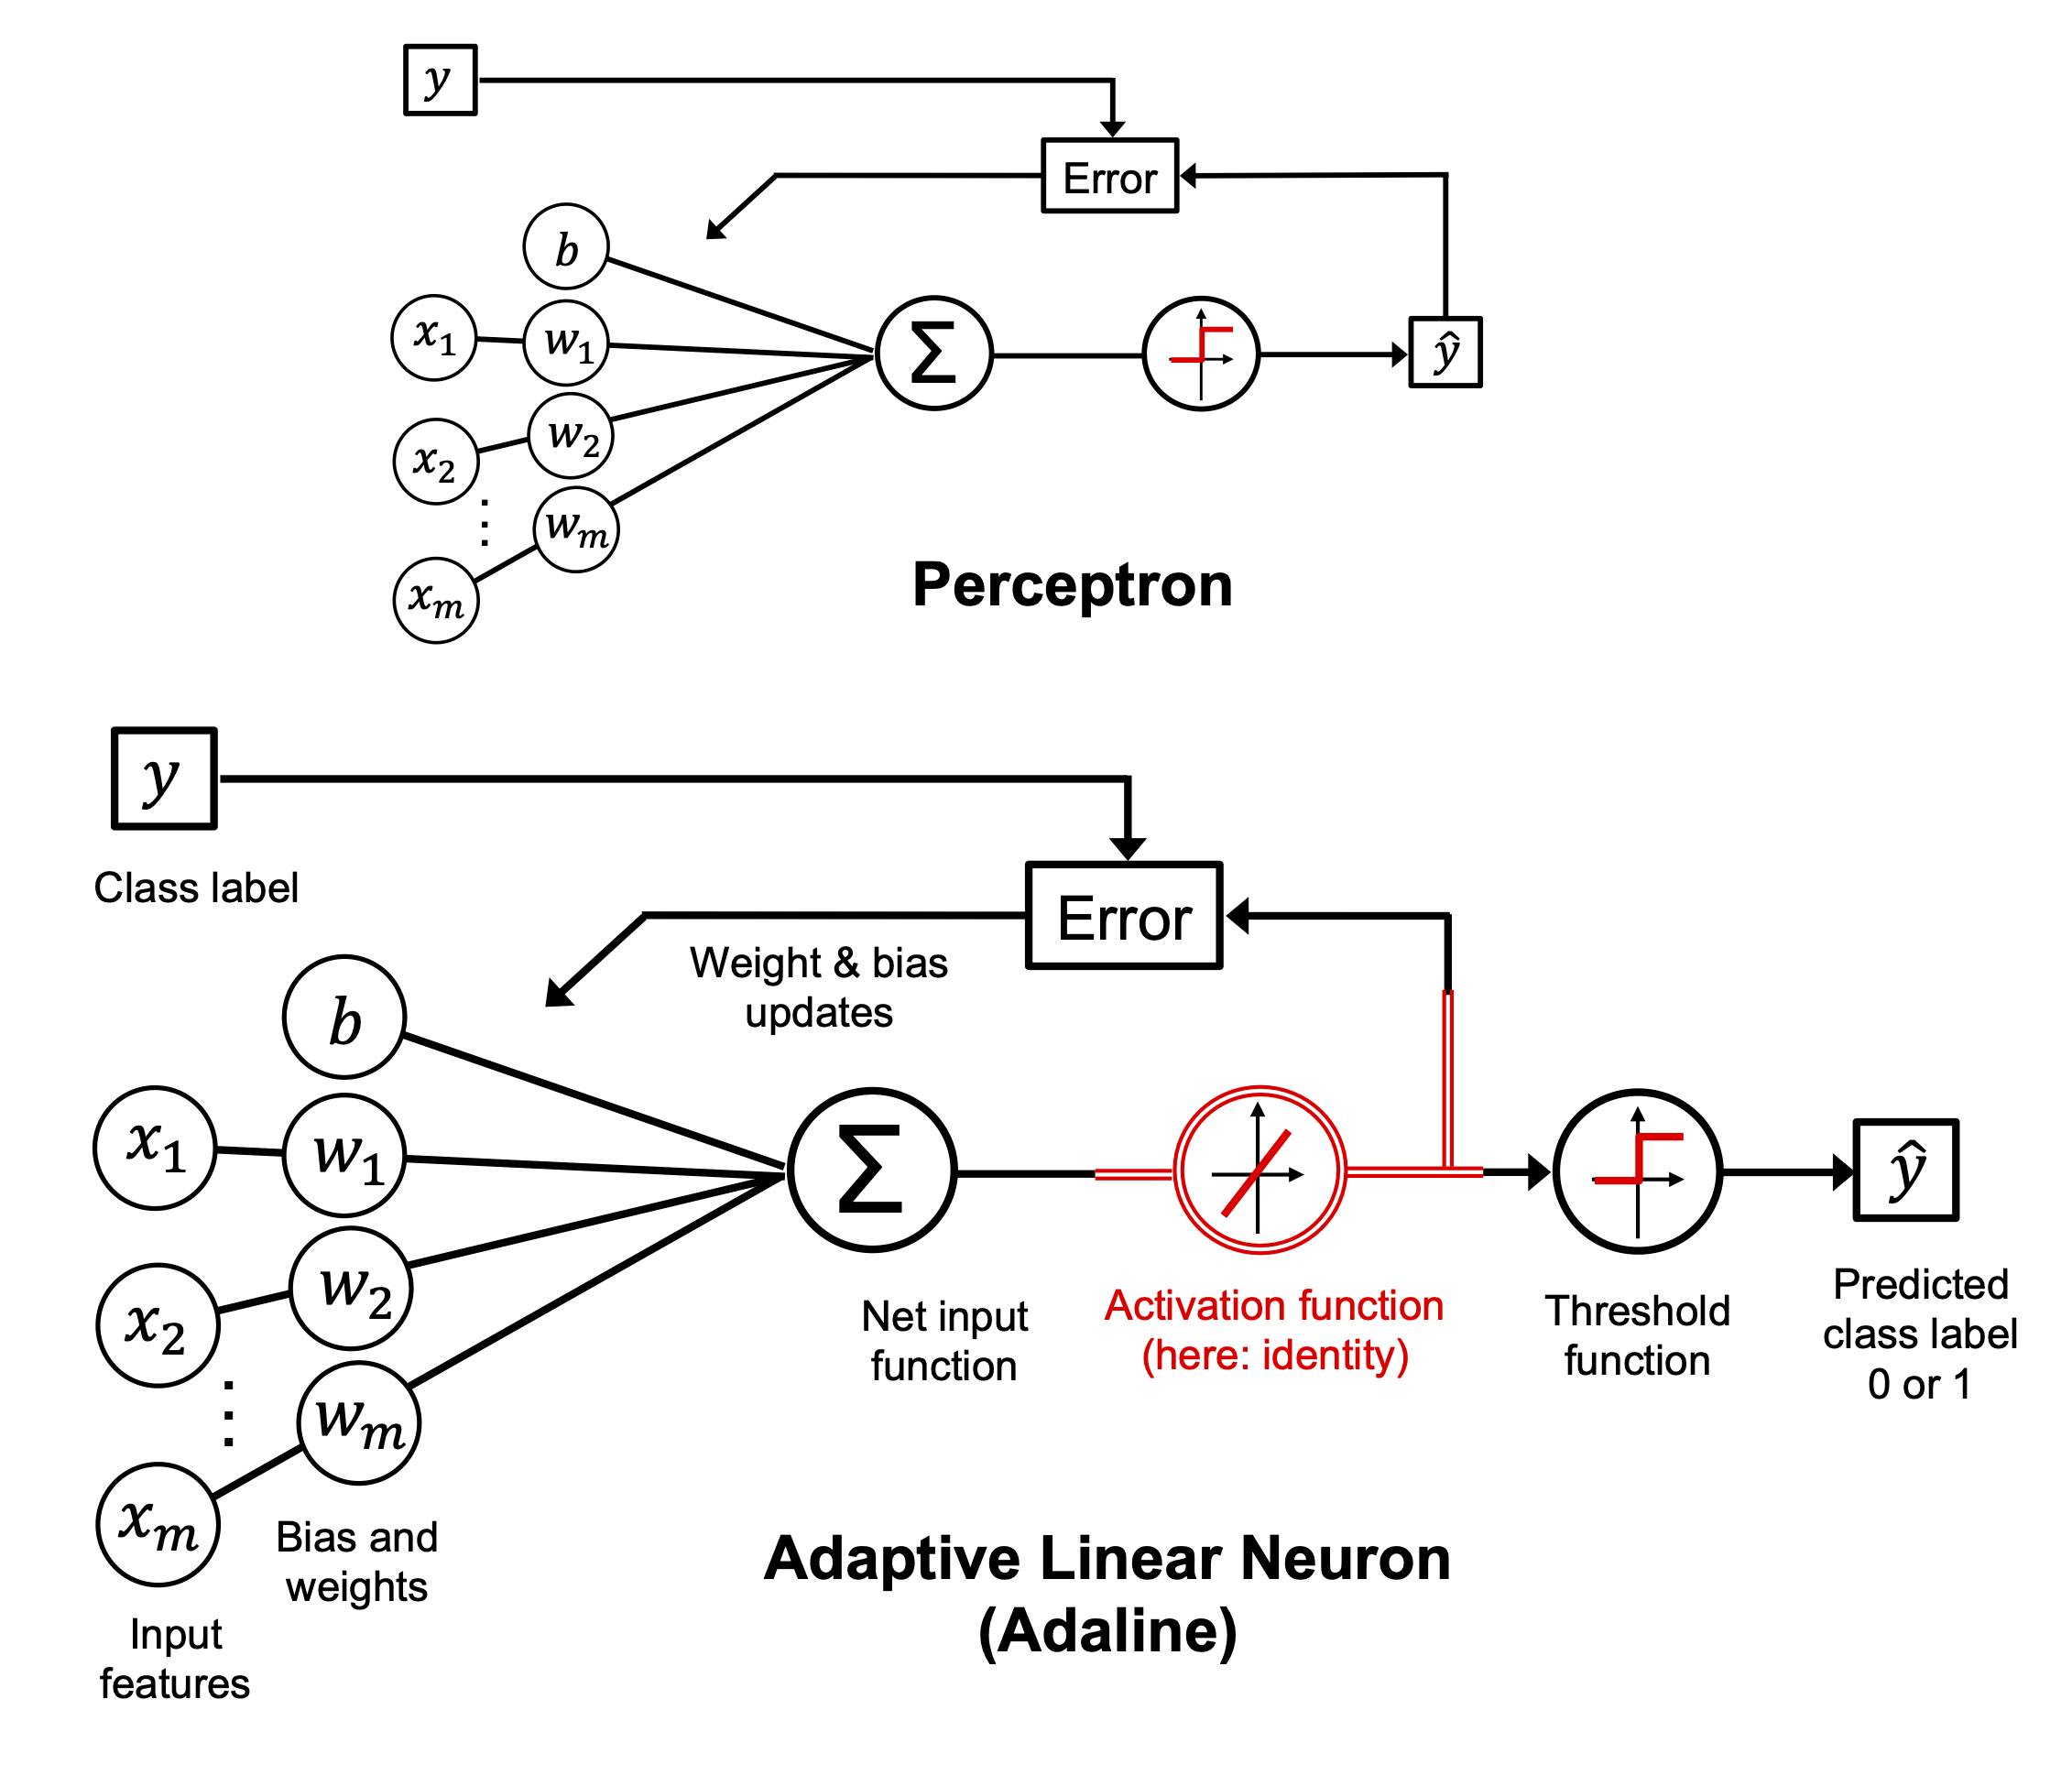

In [28]:
# Minimizing cost functions with gradient descent

Image(filename='./figures/02_09.png', width=600) 

As Figure 2.9 indicates, the Adaline algorithm compares the true class labels with the linear activation
function’s continuous valued output to compute the model error and update the weights. In contrast,
the perceptron compares the true class labels to the predicted class labels.

#### **Minimizing loss functions with Gradient Descent**

One of the key ingredients of supervised machine learning algorithms is a defined objective function
that is to be optimized during the learning process. This objective function is often a loss or cost function
that we want to minimize. In the case of Adaline, we can define the loss function, L, to learn the model
parameters as the mean squared error (MSE) between the calculated outcome and the true class label:

                                            n
                                𝐿(𝒘,b) =1/2n∑(𝑦(𝑖) − 𝜎(z^(𝑖)))^2
                                            i=1

The term 1/2 is just added for our convenience and will make it easier to derive the gradient of the loss
function with respect to the weight parameters, as we will see in the following paragraphs. The main
advantage of this continuous linear activation function, in contrast to the unit step function, is that the
loss function becomes differentiable. Another nice property of this loss function is that it is convex;
thus, we can use a very simple yet powerful optimization algorithm called gradient descent to find
the weights that minimize our loss function to classify the examples in the Iris dataset.

As illustrated in Figure 2.10, we can describe the main idea behind gradient descent as climbing down
a hill until a local or global loss minimum is reached. In each iteration, we take a step in the opposite
direction of the gradient, where the step size is determined by the value of the learning rate, as well as
the slope of the gradient (for simplicity, the following figure visualizes this only for a single weight, w):

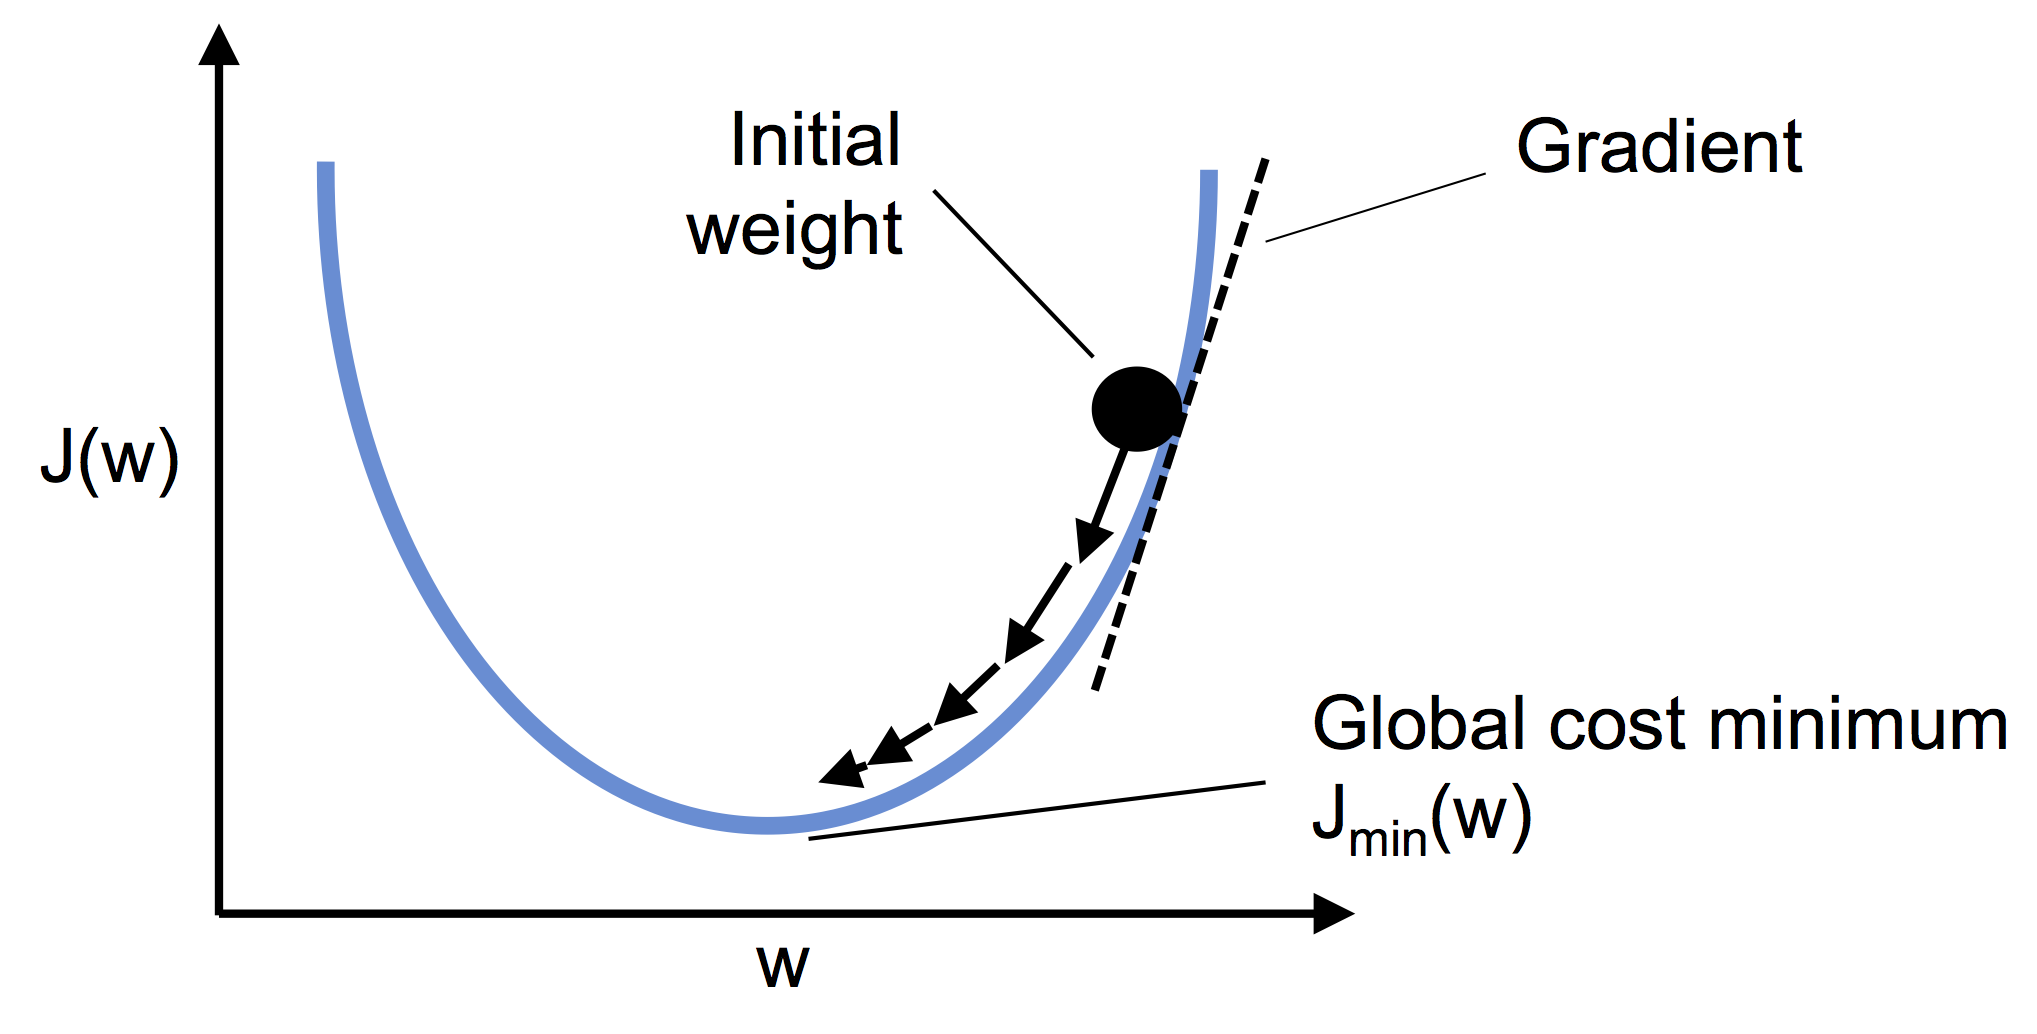

In [29]:
Image(filename='./figures/02_10.png', width=600) 

Although the Adaline learning rule looks identical to the perceptron rule, we should note that 𝜎^(𝑖)
with 𝑧^(i) = 𝒘^𝑇 𝒙^(𝑖) + 𝑏 is a real number and not an integer class label. Furthermore, the weight up-
date is calculated based on all examples in the training dataset (instead of updating the parameters
incrementally after each training example), which is why this approach is also referred to as batch
gradient descent. To be more explicit and avoid confusion when talking about related concepts later
in this chapter and this book, we will refer to this process as full batch gradient descent.

#### **Implementing Adaline in Python**

In [30]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            
            #for w_j in range(self.w_.shape[0]):
            #    self.w_[w_j] += self.eta * (2.0 * (X[:, w_j]*errors)).mean()
            
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
  # Instead of updating the weights after evaluating each individual training example, as in the perceptron,
  # we calculate the gradient based on the whole training dataset. For the bias unit, this is done via self.
  # eta * 2.0 * errors.mean() , where errors is an array containing the partial derivative values
  # Similarly, we update the weights. However note that the weight updates via the partial derivatives
  # 𝜕/𝜕b.
  # Similarly, we update the weights. However note that the weight updates via the partial derivatives dl/dwj
  # involve the feature values x j , which we can compute by multiplying errors with each feature value
  # for each weight:
  

![Screenshot from 2023-06-28 01-34-53.png](<attachment:Screenshot from 2023-06-28 01-34-53.png>)
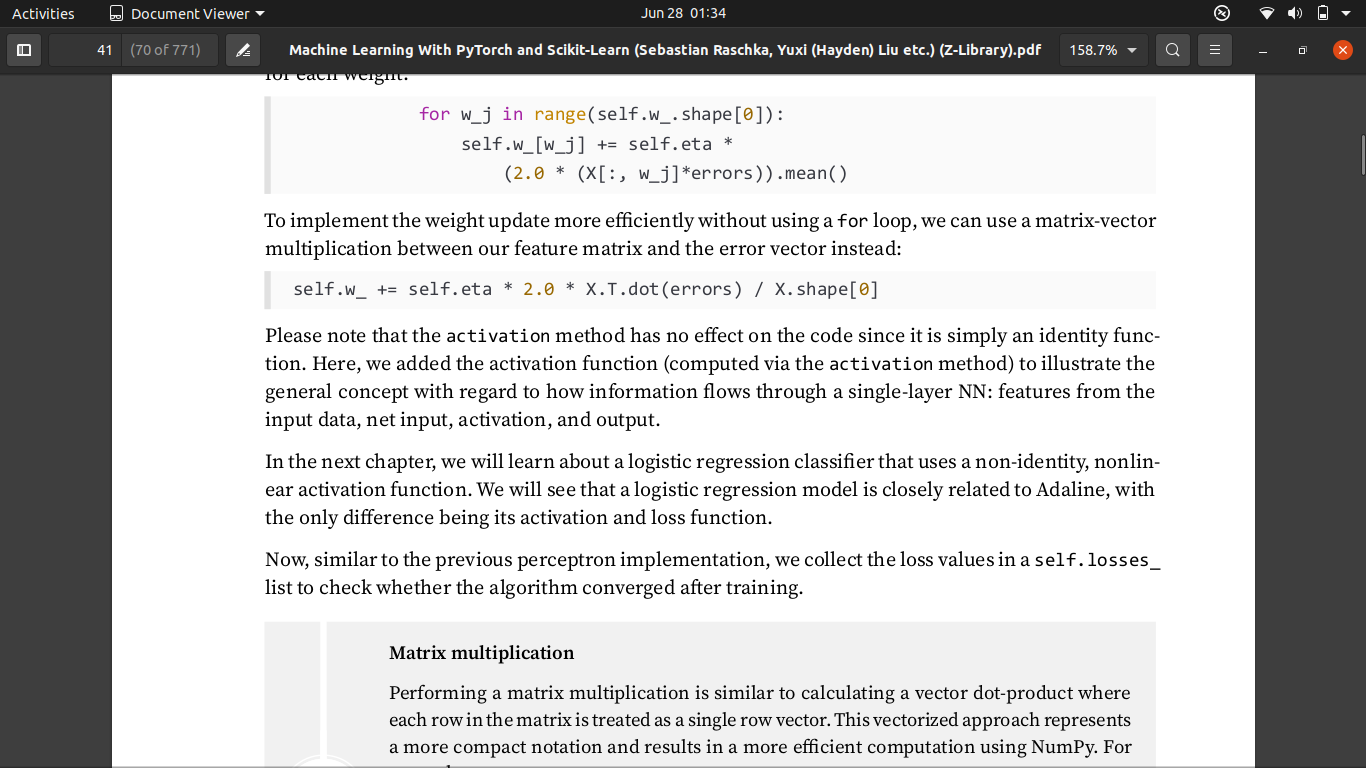

As we can see in the resulting loss function plots, we encountered two different types of problems. The
left chart shows what could happen if we choose a learning rate that is too large. Instead of minimizing
the loss function, the MSE becomes larger in every epoch, because we overshoot the global minimum.
On the other hand, we can see that the loss decreases on the right plot, but the chosen learning rate,
𝜂𝜂 𝜂 𝜂𝜂0001 , is so small that the algorithm would require a very large number of epochs to converge
to the global loss minimum:

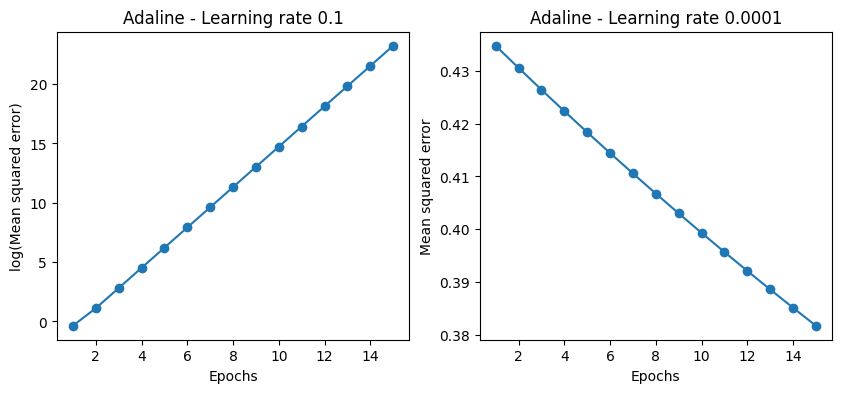

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

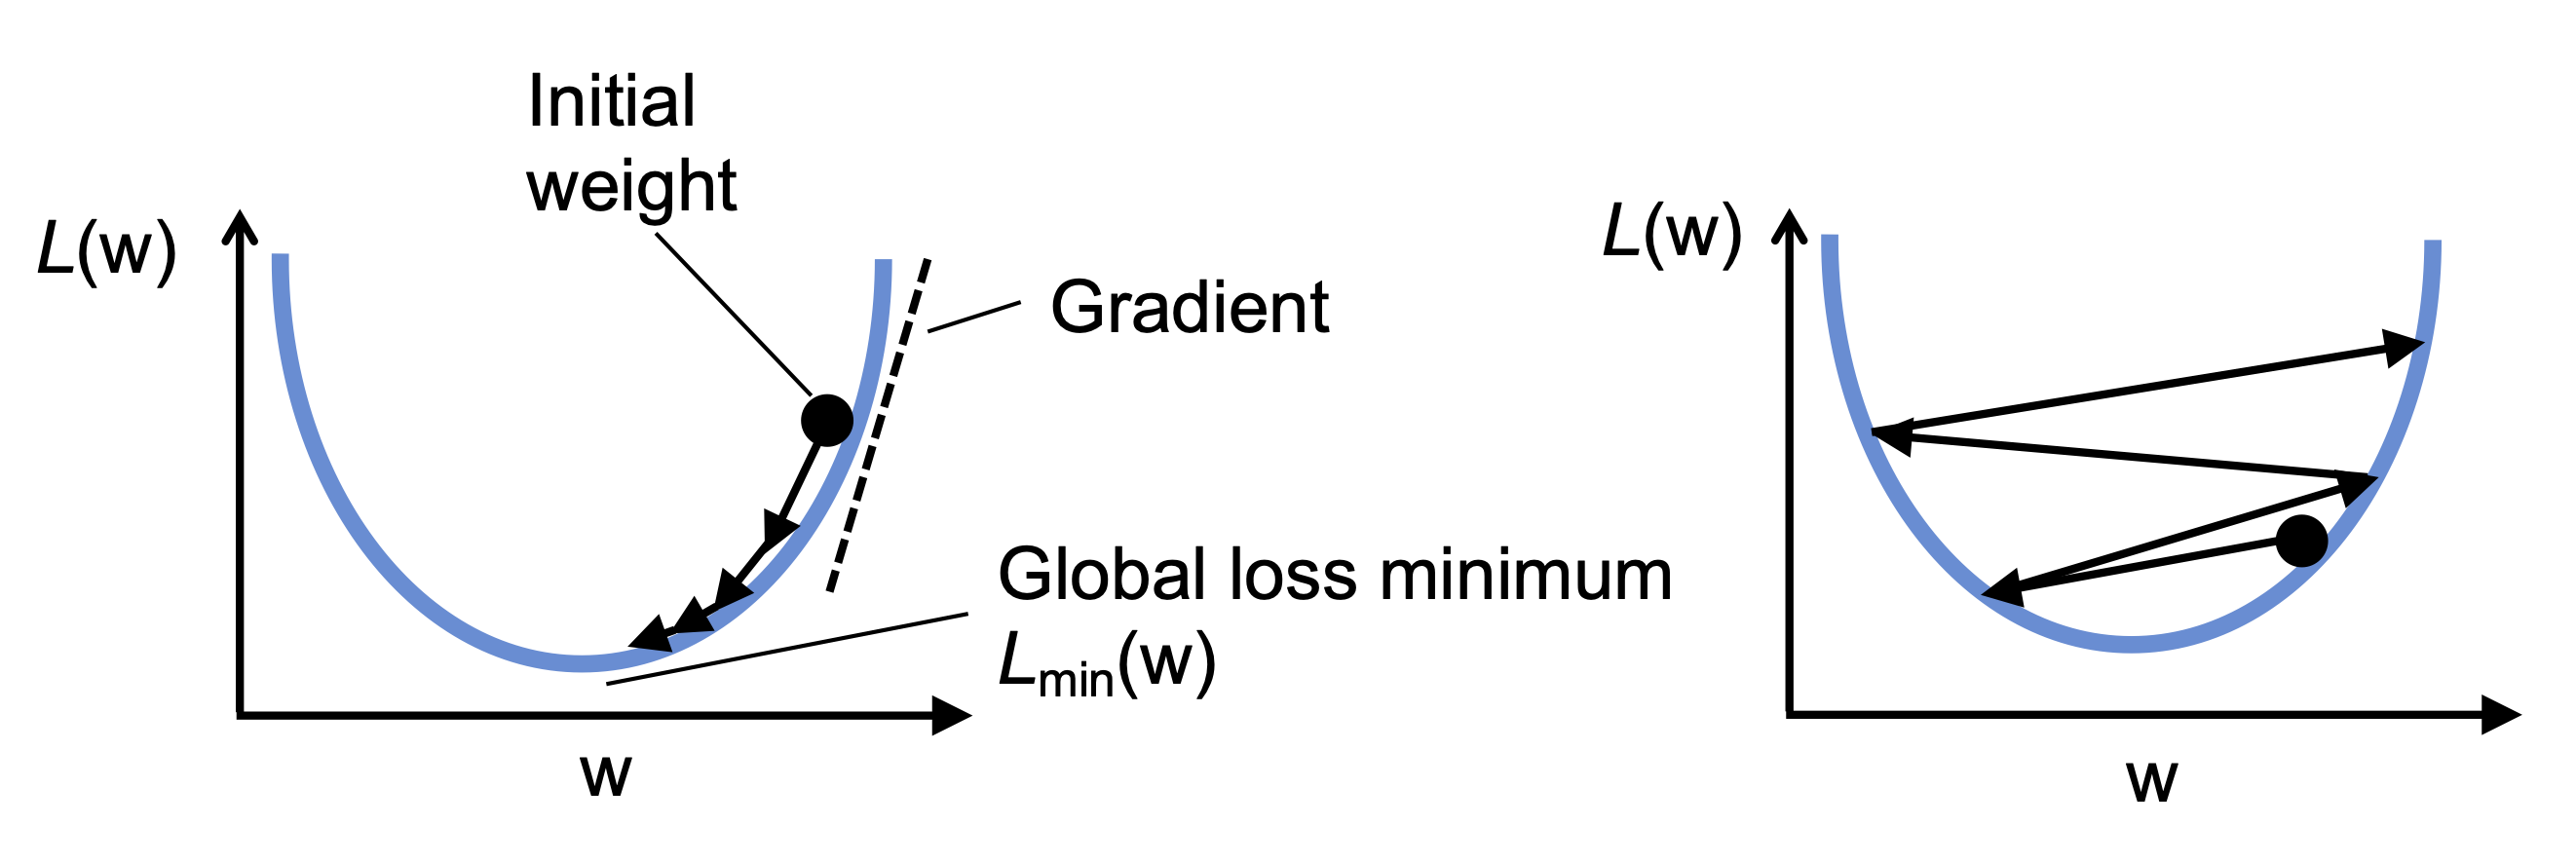

In [32]:
Image(filename='./figures/02_12.png', width=700) 


#### **Improving gradient descent through feature scaling**


Many machine learning algorithms that we will encounter throughout this book require some sort of
feature scaling for optimal performance, which we will discuss in more detail in Chapter 3, A Tour of
Machine Learning Classifiers Using Scikit-Learn, and Chapter 4, Building Good Training Datasets – Data
Preprocessing.

![Screenshot from 2023-06-28 01-39-14.png](<attachment:Screenshot from 2023-06-28 01-39-14.png>)
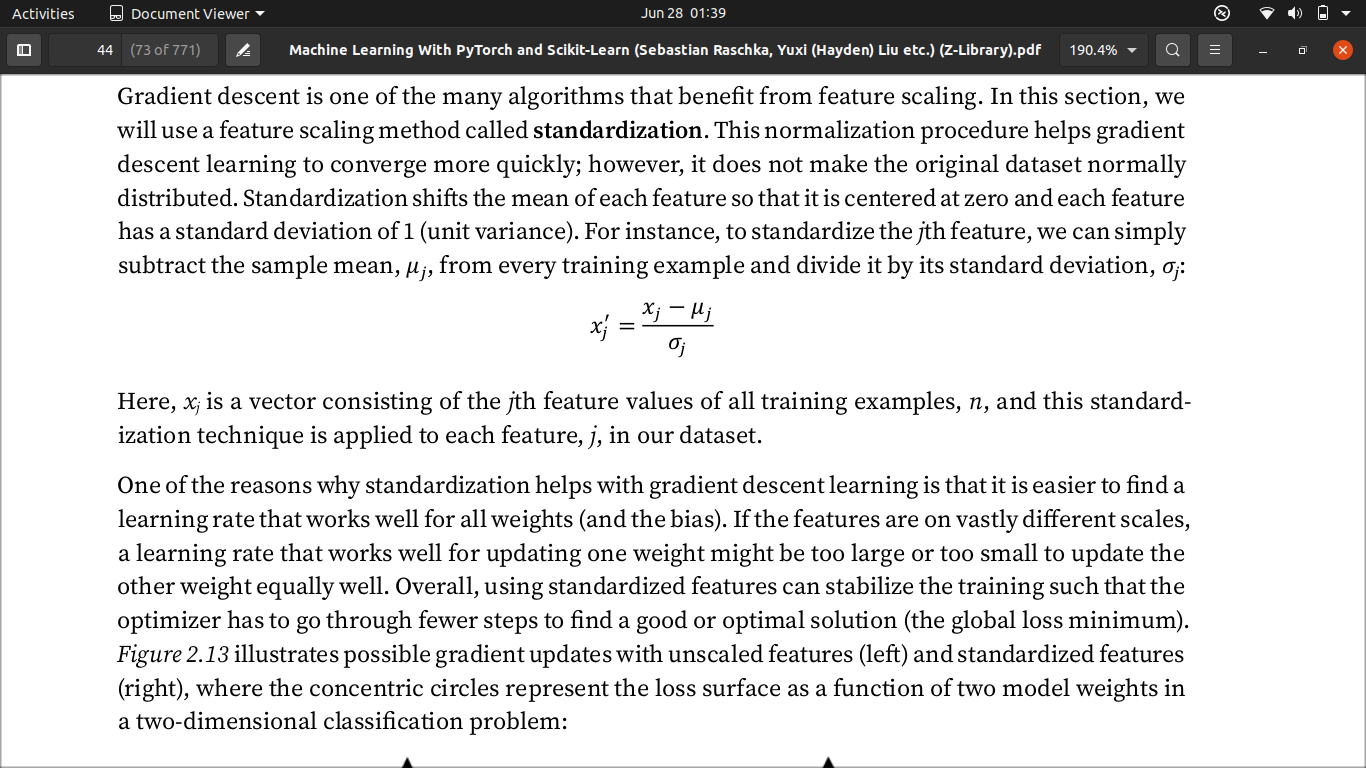

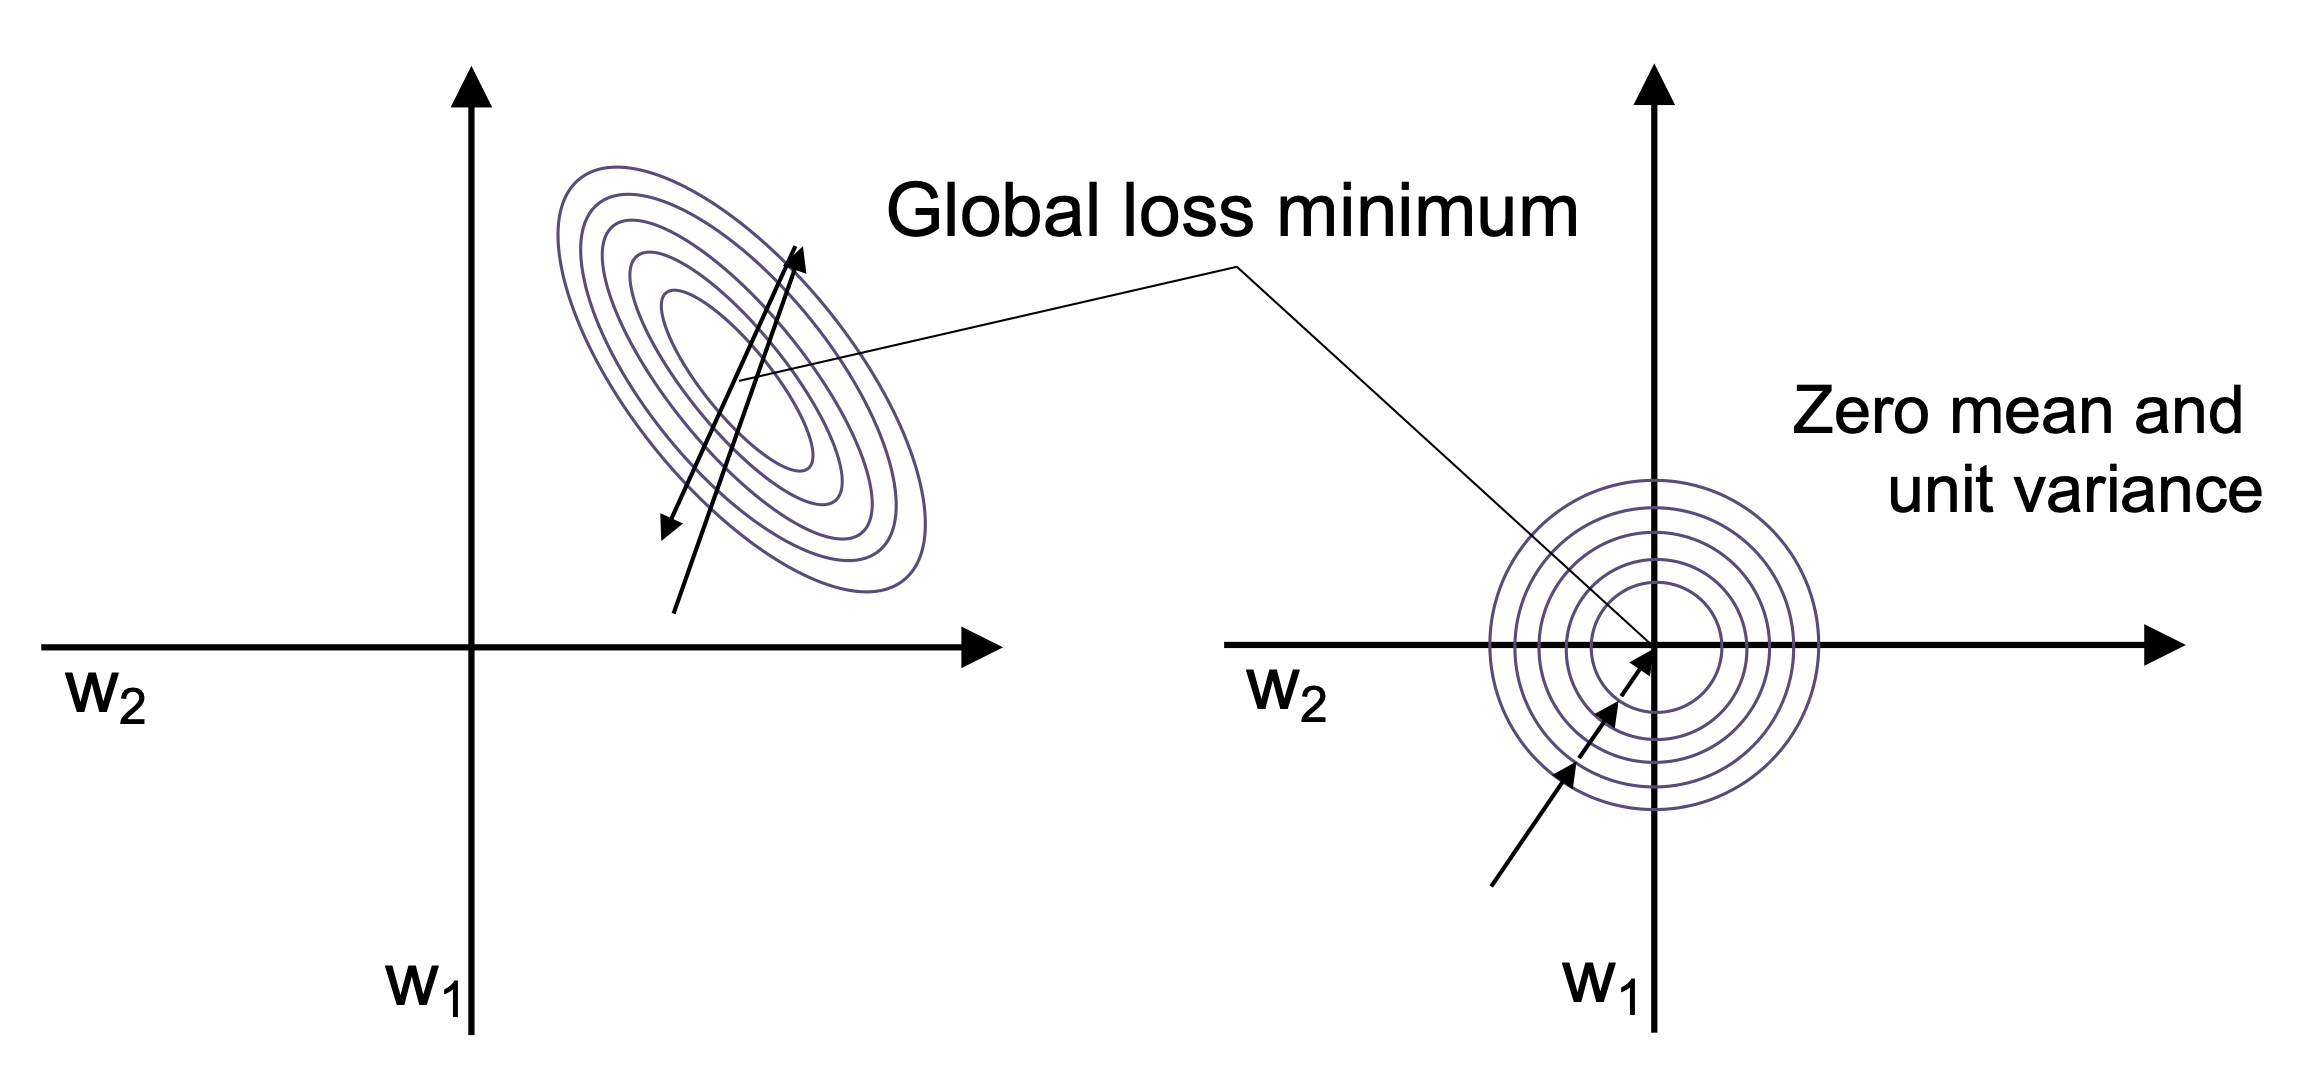

In [34]:
Image(filename='./figures/02_13.png', width=700) 


Standardization can easily be achieved by using the built-in NumPy methods mean and std :

In [35]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

After standardization, we will train Adaline again and see that it now converges after a small number
of epochs using a learning rate of 𝜂 = 0.5 :

In [ ]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

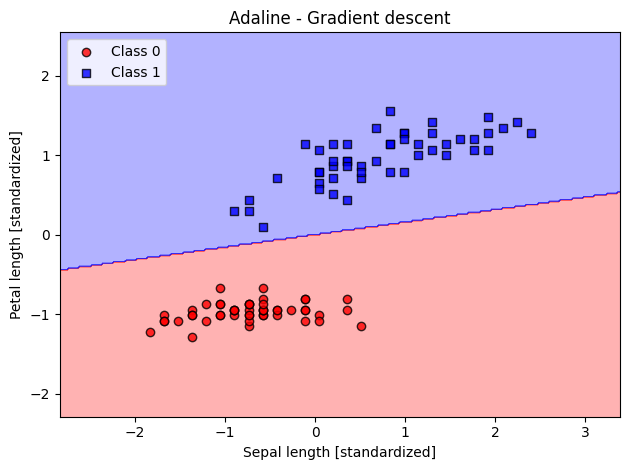

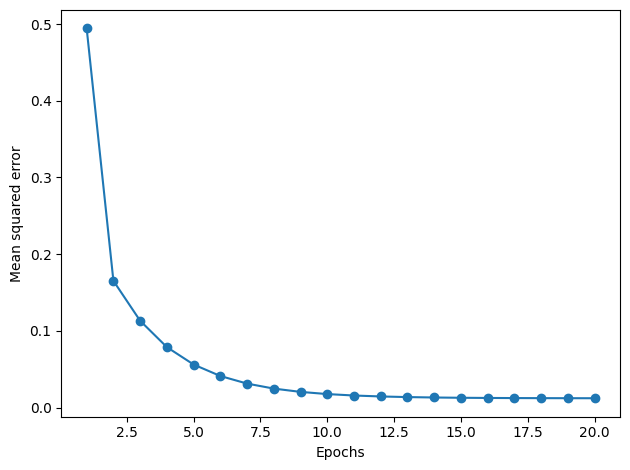

In [36]:


plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

plt.tight_layout()
#plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

As we can see in the plots, Adaline has now converged after training on the standardized features.
However, note that the MSE remains non-zero even though all flower examples were classified correctly.

### **Large scale machine learning and stochastic gradient descent**

![Screenshot from 2023-06-28 01-48-05.png](<attachment:Screenshot from 2023-06-28 01-48-05.png>)
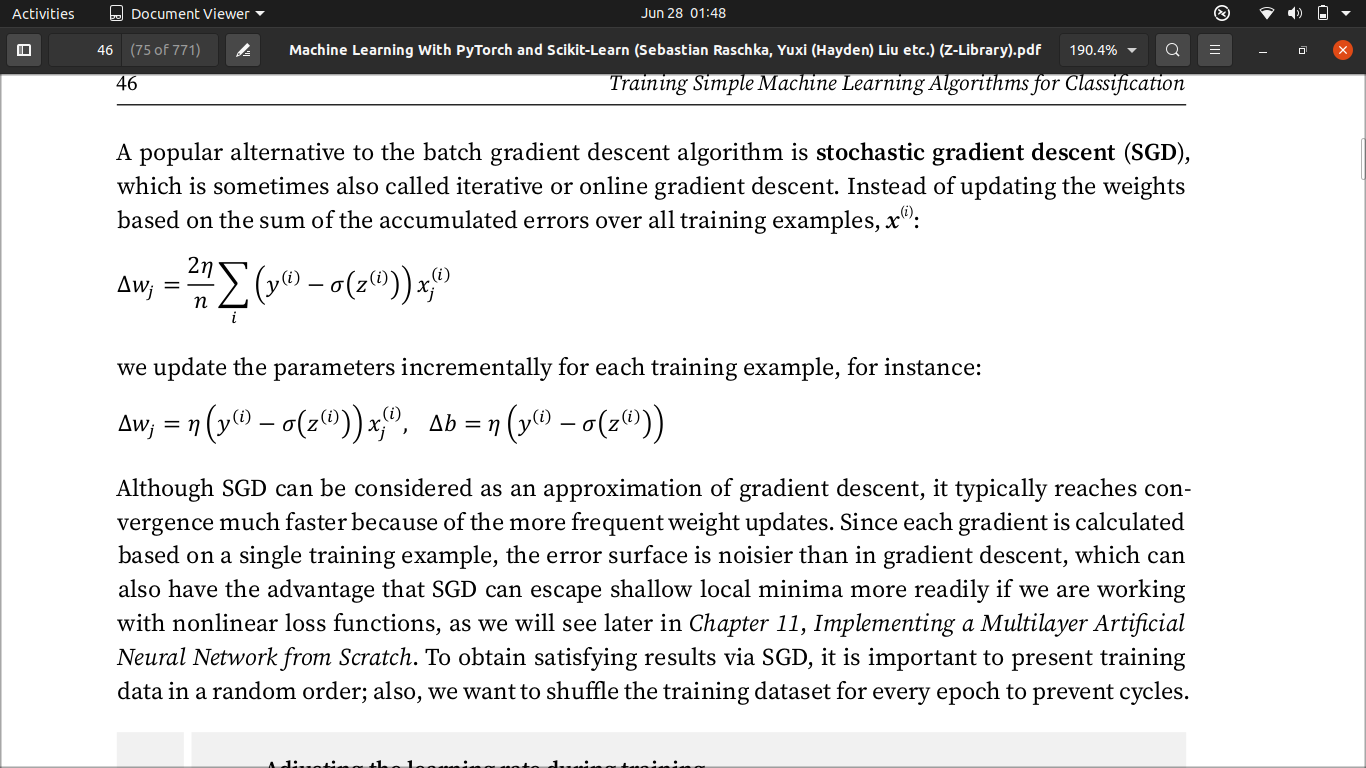

Since we already implemented the Adaline learning rule using gradient descent, we only need to
make a few adjustments to modify the learning algorithm to update the weights via SGD. Inside the
fit method, we will now update the weights after each training example. Furthermore, we will imple-
ment an additional partial_fit method, which does not reinitialize the weights, for online learning.
In order to check whether our algorithm converged after training, we will calculate the loss as the
average loss of the training examples in each epoch. Furthermore, we will add an option to shuffle the
training data before each epoch to avoid repetitive cycles when we are optimizing the loss function;
via the random_state parameter, we allow the specification of a random seed for reproducibility:

In [37]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


The _shuffle method that we are now using in the AdalineSGD classifier works as follows: via the
permutation function in np.random , we generate a random sequence of unique numbers in the range
0 to 100. Those numbers can then be used as indices to shuffle our feature matrix and class label vector.

We can then use the fit method to train the AdalineSGD classifier and use our plot_decision_regions
to plot our training results:

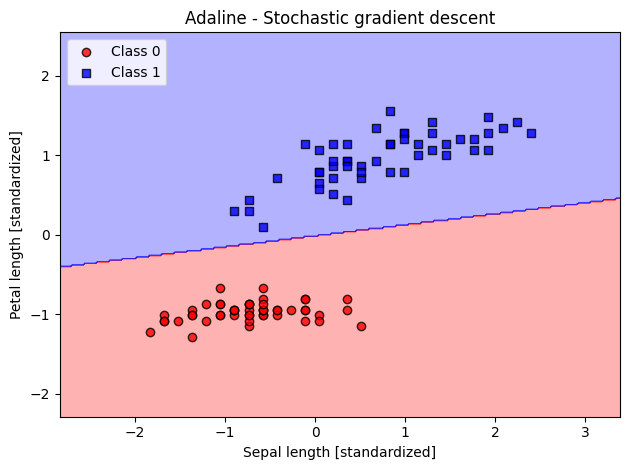

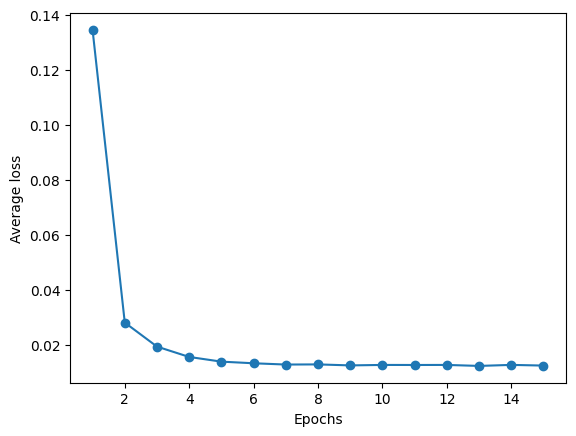

In [38]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('figures/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')

plt.savefig('figures/02_15_2.png', dpi=300)
plt.show()

In [39]:
ada_sgd.partial_fit(X_std[0, :], y[0])


In [44]:
!pwd

/home/openbravo/Personal/Development/ML_with_pytorch_and_scikit-learn/chp_2


In [45]:
!ls

chapter_2.ipynb  figures


In [47]:
# !pip install -q nbconvert
!jupyter nbconvert --to script  chapter_2.ipynb --output ch02.py

SyntaxError: invalid syntax (720171633.py, line 2)